In [108]:
import os

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view   
import optuna

In [2]:
from one.generator.univariate import UnivariateDataGenerator
from one.models import *
from one.utils import *
from one.scorer.pot import *

In [1]:
%load_ext autoreload
%autoreload 2

In [99]:
plt.rcParams["figure.figsize"] = 40,10
plt.rcParams["font.size"] = 15

# Generating Univariate Anomalies

In [178]:
generator = UnivariateDataGenerator(stream_length=5000)

In [184]:
generator.collective_seasonal_outliers(0.1, 1., 50)

## Visualization

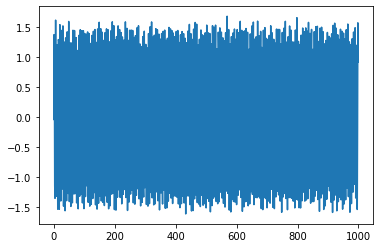

In [185]:
# Train
plt.plot(generator.train)

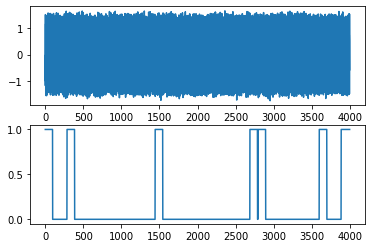

In [186]:
# Test Set

fig, axes = plt.subplots(2)

axes[0].plot(generator.test)
axes[1].plot(generator.label)

## Save

In [60]:
SAVE_DIR = "./data/univar-synth/"

In [61]:
# Point Global
out_type = "point_global"
config_1 = [0.05, 1.1, 50] #ratio, factor, radius
config_2 = [0.05, 1.25, 50] #ratio, factor, radius
config_3 = [0.05, 1.5, 50] #ratio, factor, radius
config_4 = [0.05, 2, 50] #ratio, factor, radius
config_5 = [0.05, 3, 50] #ratio, factor, radius

for idx, config in enumerate([config_1, config_2, config_3, config_4, config_5]):
    generator = UnivariateDataGenerator(stream_length=5000)
    generator.point_global_outliers(*config)
    
    # save train
    file_name = f"{out_type}/{idx}-{out_type}-factor{config[1]}-train.txt"
    np.savetxt(SAVE_DIR+file_name, generator.train)
    
    # save test
    file_name = f"{out_type}/{idx}-{out_type}-factor{config[1]}-test.txt"
    np.savetxt(SAVE_DIR+file_name, generator.test)
    
    # save labels
    file_name = f"{out_type}/{idx}-{out_type}-factor{config[1]}-labels.txt"
    np.savetxt(SAVE_DIR+file_name, generator.label)

In [72]:
# Point Contextual
out_type = "point_contextual"
config_1 = [0.05, 1.1, 50] #ratio, factor, radius
config_2 = [0.05, 1.25, 50] #ratio, factor, radius
config_3 = [0.05, 1.5, 50] #ratio, factor, radius
config_4 = [0.05, 2, 50] #ratio, factor, radius
config_5 = [0.05, 3, 50] #ratio, factor, radius

for idx, config in enumerate([config_1, config_2, config_3, config_4, config_5]):
    generator = UnivariateDataGenerator(stream_length=5000)
    generator.point_contextual_outliers(*config)
    
    # save train
    file_name = f"{out_type}/{idx}-{out_type}-factor{config[1]}-train.txt"
    np.savetxt(SAVE_DIR+file_name, generator.train)
    
    # save test
    file_name = f"{out_type}/{idx}-{out_type}-factor{config[1]}-test.txt"
    np.savetxt(SAVE_DIR+file_name, generator.test)
    
    # save labels
    file_name = f"{out_type}/{idx}-{out_type}-factor{config[1]}-labels.txt"
    np.savetxt(SAVE_DIR+file_name, generator.label)
    

1.7417887913516432 -1.6726185719806244
1.7353734623366663 -1.6760854325647239
1.6691251966555247 -1.6472444221269975
1.7018515562900127 -1.6991571496599907
1.6840856239471862 -1.6880153302736494


In [97]:
# Collective Global
out_type = "collective_global"
config_1 = [0.05, 50, 1.1] #ratio, radius, coef
config_2 = [0.05, 50, 1.25] #ratio, radius, coef
config_3 = [0.05, 50, 1.5] #ratio, radius, coef
config_4 = [0.05, 50, 2] #ratio, radius, coef
config_5 = [0.05, 50, 3] #ratio, radius, coef

for idx, config in enumerate([config_1, config_2, config_3, config_4, config_5]):
    *args, coef = config
    generator = UnivariateDataGenerator(stream_length=5000)
    generator.collective_global_outliers(*args, "square", coef=coef)
    
    # save train
    file_name = f"{out_type}/{idx}-{out_type}-factor{coef}-train.txt"
    np.savetxt(SAVE_DIR+file_name, generator.train)
    
    # save test
    file_name = f"{out_type}/{idx}-{out_type}-factor{coef}-test.txt"
    np.savetxt(SAVE_DIR+file_name, generator.test)
    
    # save labels
    file_name = f"{out_type}/{idx}-{out_type}-factor{coef}-labels.txt"
    np.savetxt(SAVE_DIR+file_name, generator.label)

In [128]:
# Collective Trend
out_type = "collective_trend"
config_1 = [0.05, 0.01, 50] #ratio, factor, radius
config_2 = [0.05, 0.02, 50] #ratio, factor, radius
config_3 = [0.05, 0.03, 50] #ratio, factor, radius
config_4 = [0.05, 0.04, 50] #ratio, factor, radius
config_5 = [0.05, 0.05, 50] #ratio, factor, radius

for idx, config in enumerate([config_1, config_2, config_3, config_4, config_5]):
    generator = UnivariateDataGenerator(stream_length=5000)
    generator.collective_trend_outliers(*config)
    
    # save train
    file_name = f"{out_type}/{idx}-{out_type}-factor{config[1]}-train.txt"
    np.savetxt(SAVE_DIR+file_name, generator.train)
    
    # save test
    file_name = f"{out_type}/{idx}-{out_type}-factor{config[1]}-test.txt"
    np.savetxt(SAVE_DIR+file_name, generator.test)
    
    # save labels
    file_name = f"{out_type}/{idx}-{out_type}-factor{config[1]}-labels.txt"
    np.savetxt(SAVE_DIR+file_name, generator.label)

In [187]:
# Collective Seasonal
out_type = "collective_seasonal"
config_1 = [0.1, 1.1, 50] #ratio, factor, radius
config_2 = [0.1, 1.25, 50] #ratio, factor, radius
config_3 = [0.1, 1.5, 50] #ratio, factor, radius
config_4 = [0.1, 2, 50] #ratio, factor, radius
config_5 = [0.1, 3, 50] #ratio, factor, radius

for idx, config in enumerate([config_1, config_2, config_3, config_4, config_5]):
    generator = UnivariateDataGenerator(stream_length=5000)
    generator.collective_seasonal_outliers(*config)
    
    # save train
    file_name = f"{out_type}/{idx}-{out_type}-factor{config[1]}-train.txt"
    np.savetxt(SAVE_DIR+file_name, generator.train)
    
    # save test
    file_name = f"{out_type}/{idx}-{out_type}-factor{config[1]}-test.txt"
    np.savetxt(SAVE_DIR+file_name, generator.test)
    
    # save labels
    file_name = f"{out_type}/{idx}-{out_type}-factor{config[1]}-labels.txt"
    np.savetxt(SAVE_DIR+file_name, generator.label)

# Visualize Dataset

In [ ]:
PATH0 = "./data/univar-synth/point_global/"
PATH1 = "./data/univar-synth/point_contextual/"
PATH2 = "./data/univar-synth/collective_global/"
PATH3 = "./data/univar-synth/collective_trend/"
PATH4 = "./data/univar-synth/collective_seasonal/"
PATHS = [PATH0, PATH1, PATH2, PATH3, PATH4]

/var/folders/4s/g2bjtm6d3ps_zp4h2cr1z04m0000gq/T/ipykernel_62111/2650922786.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2)


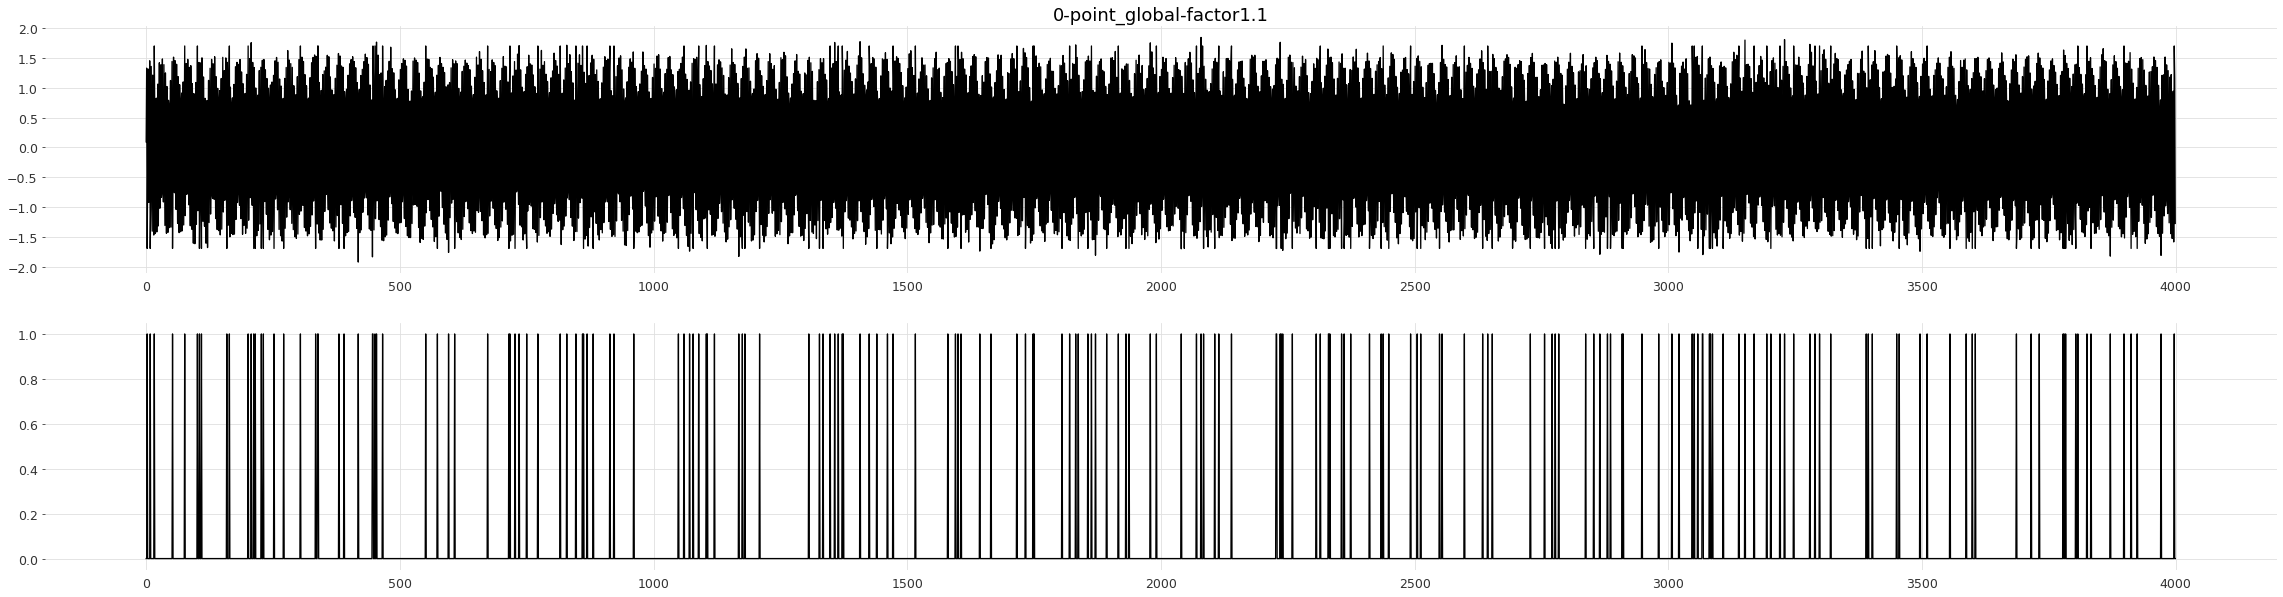

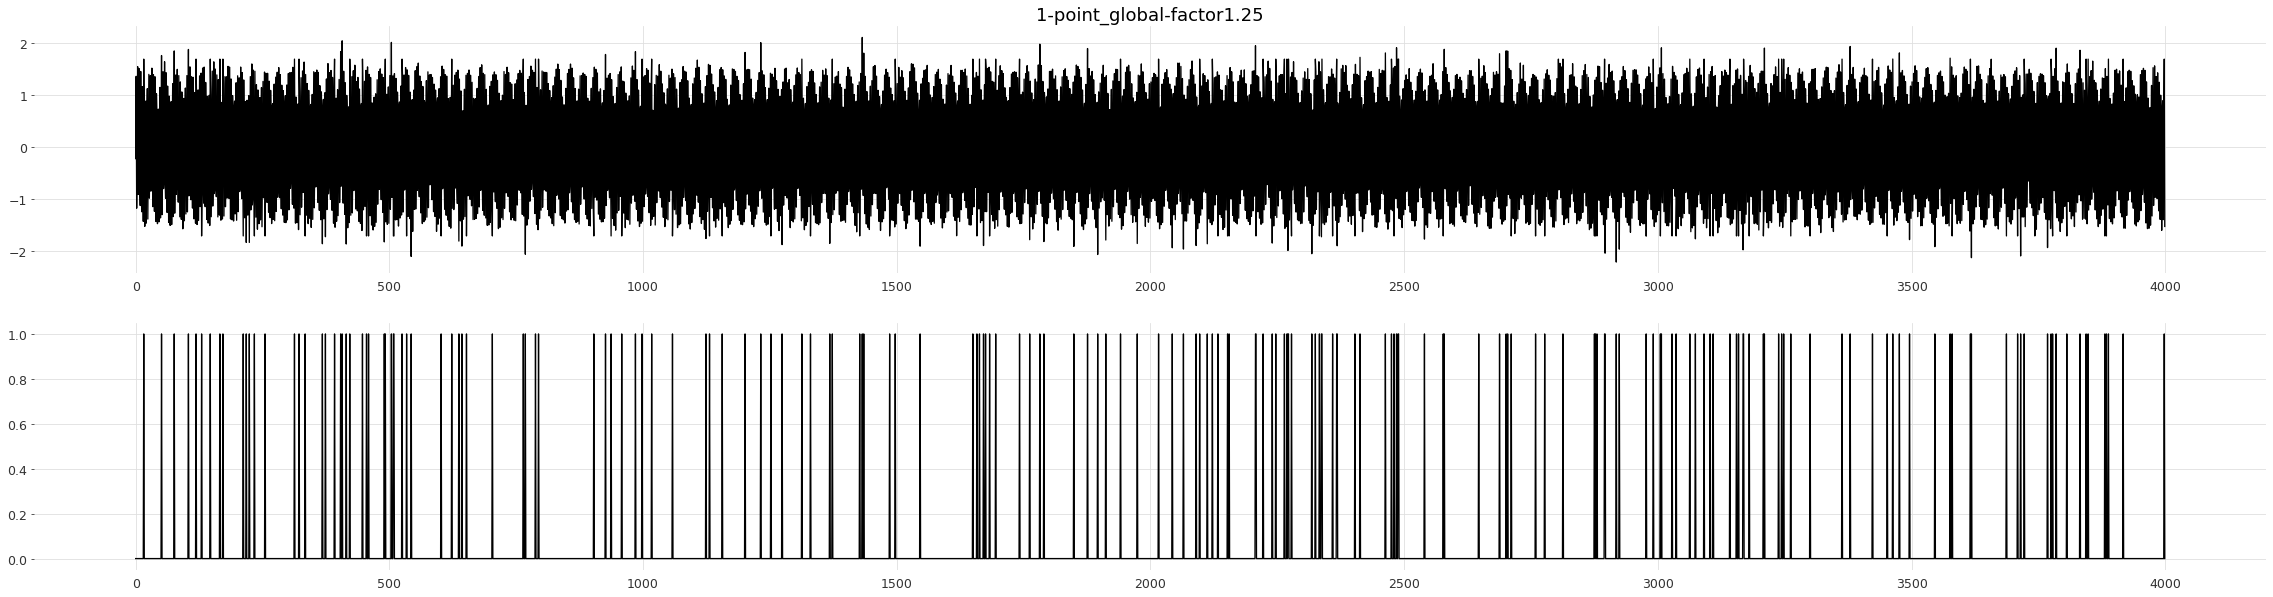

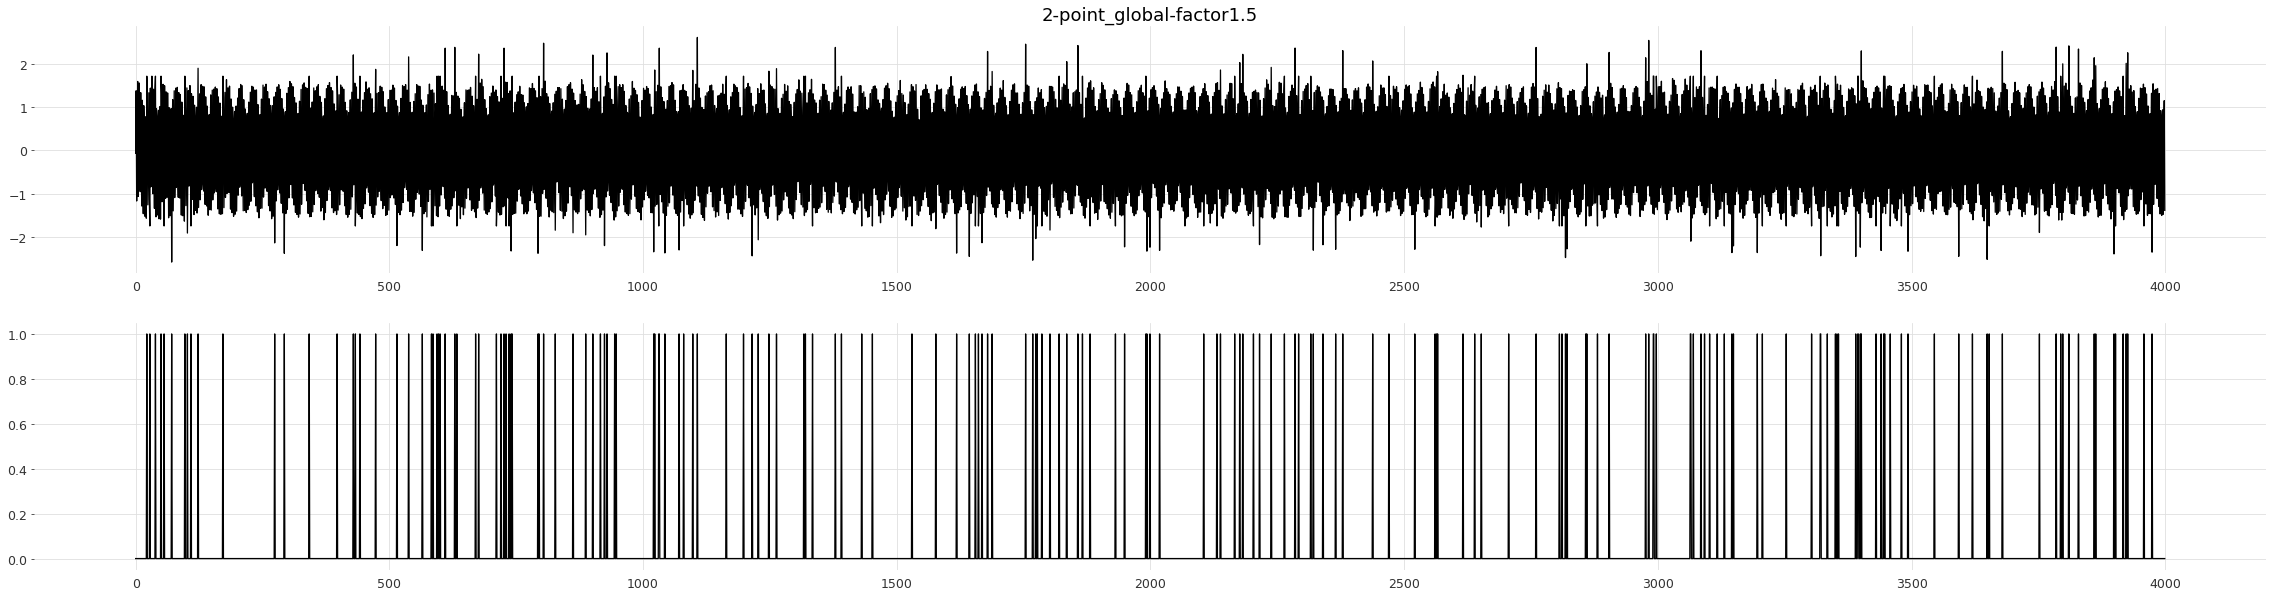

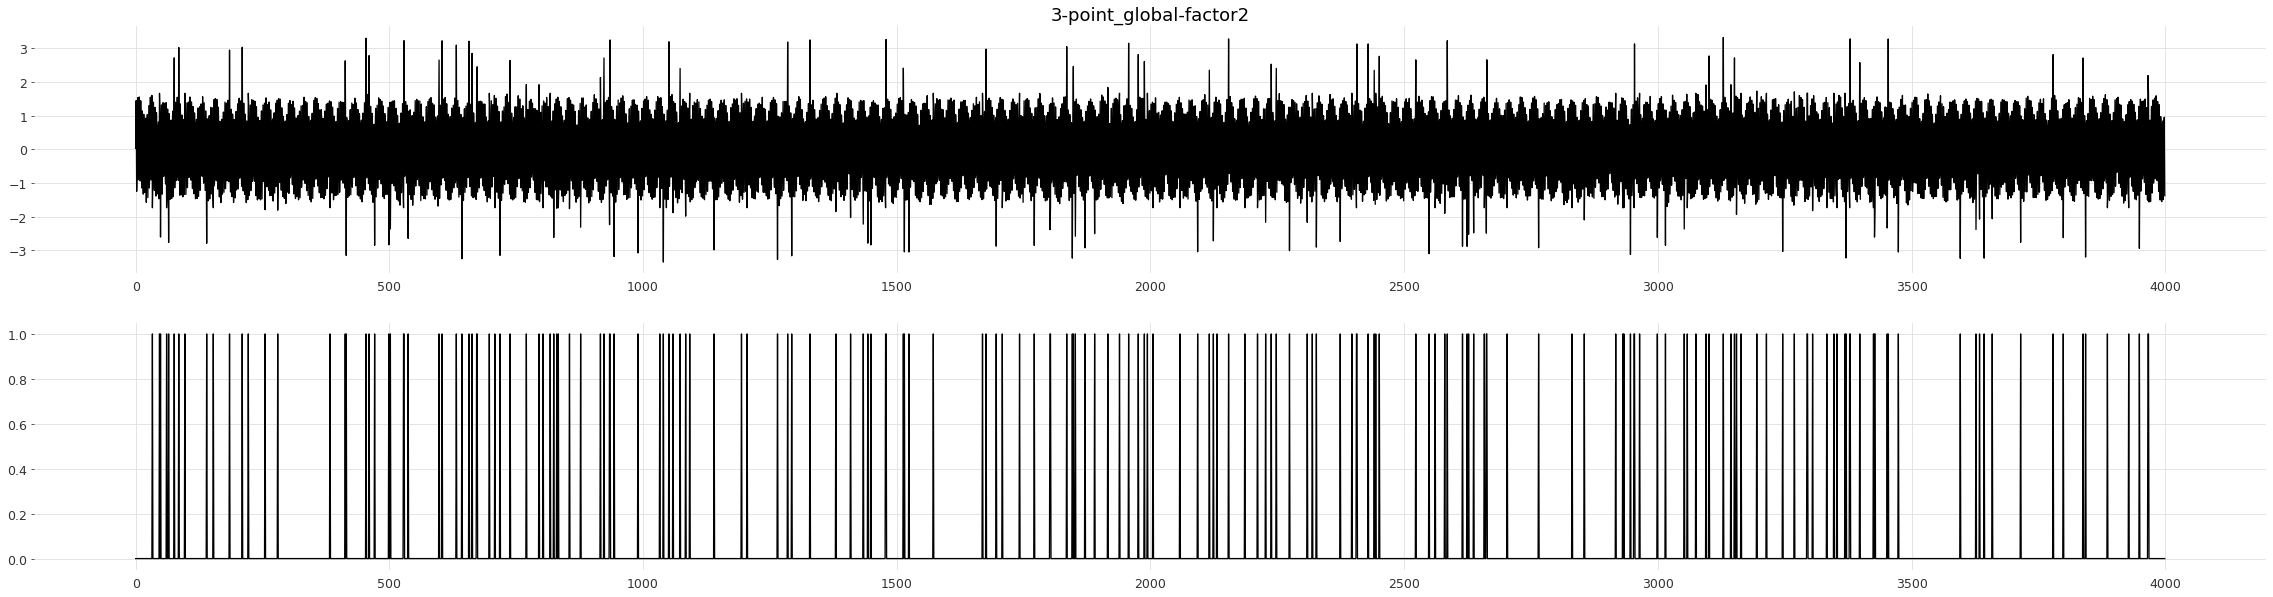

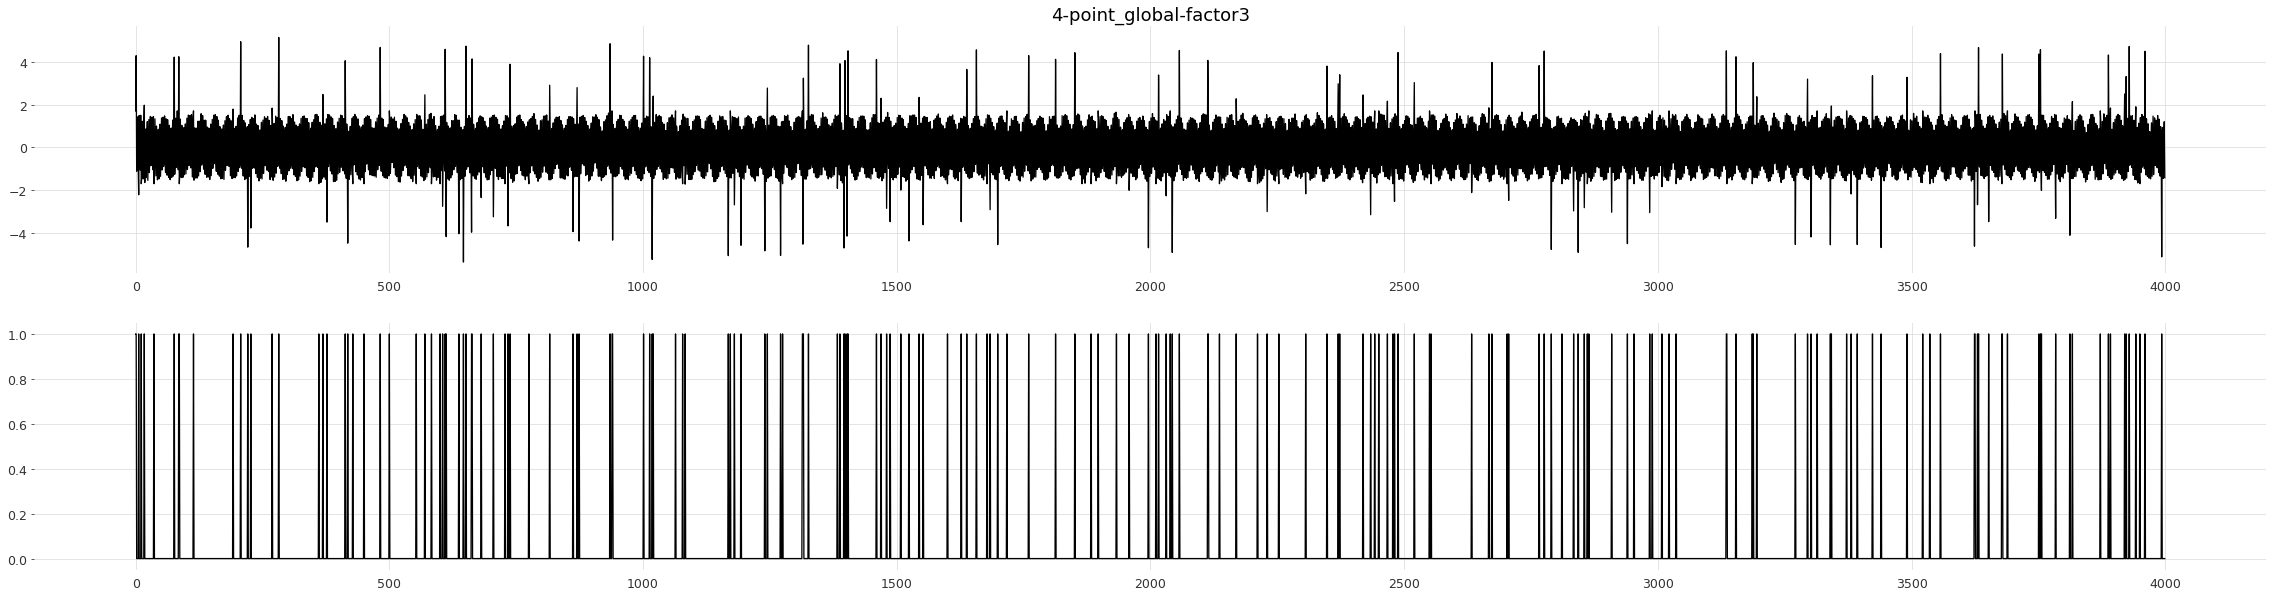

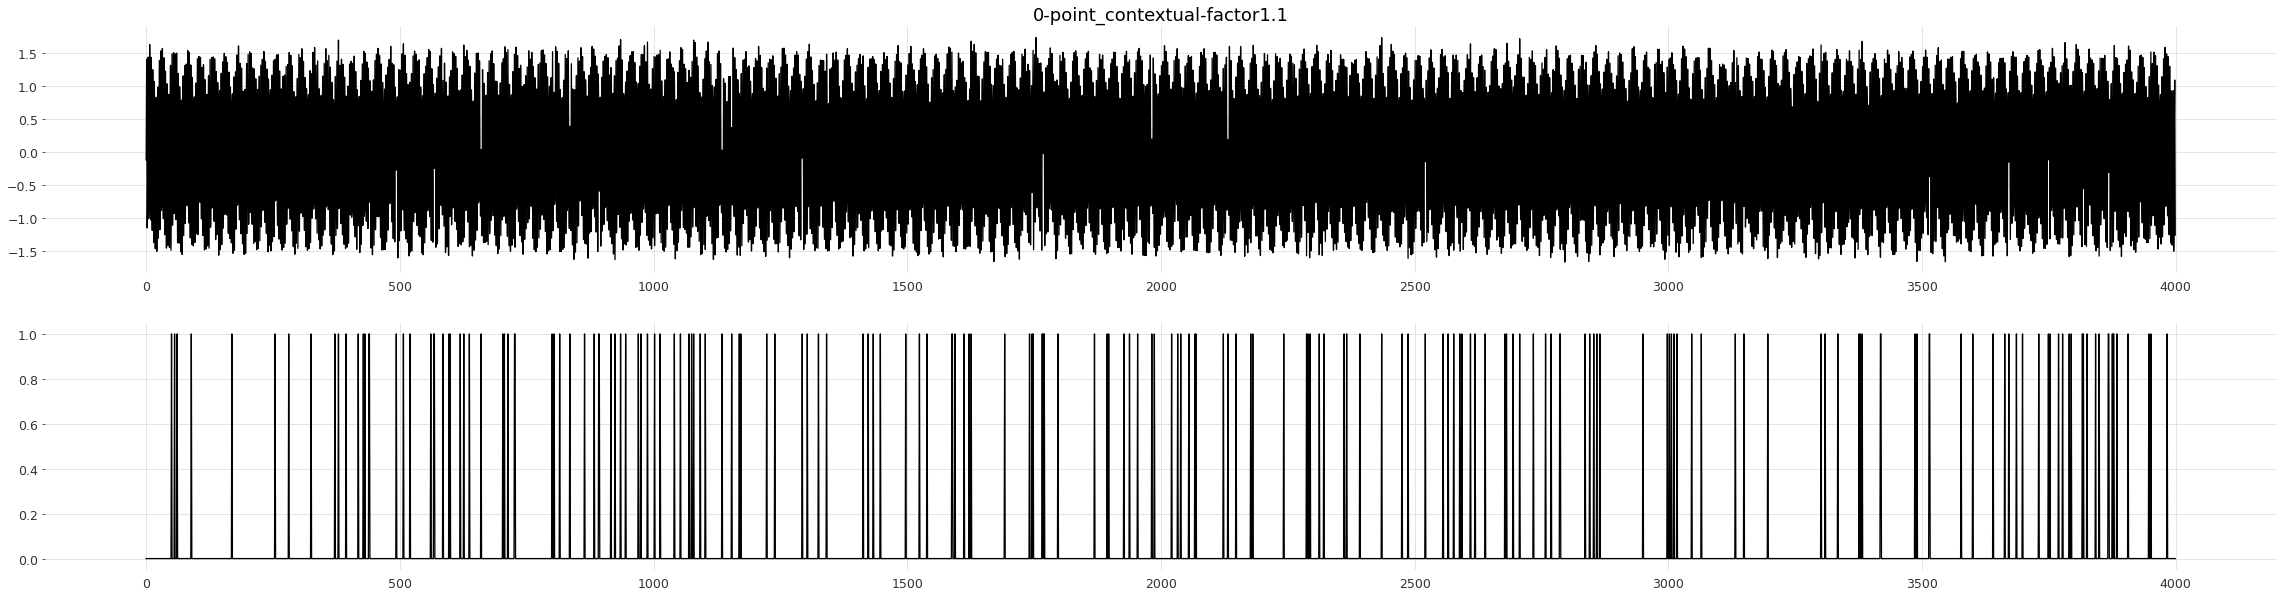

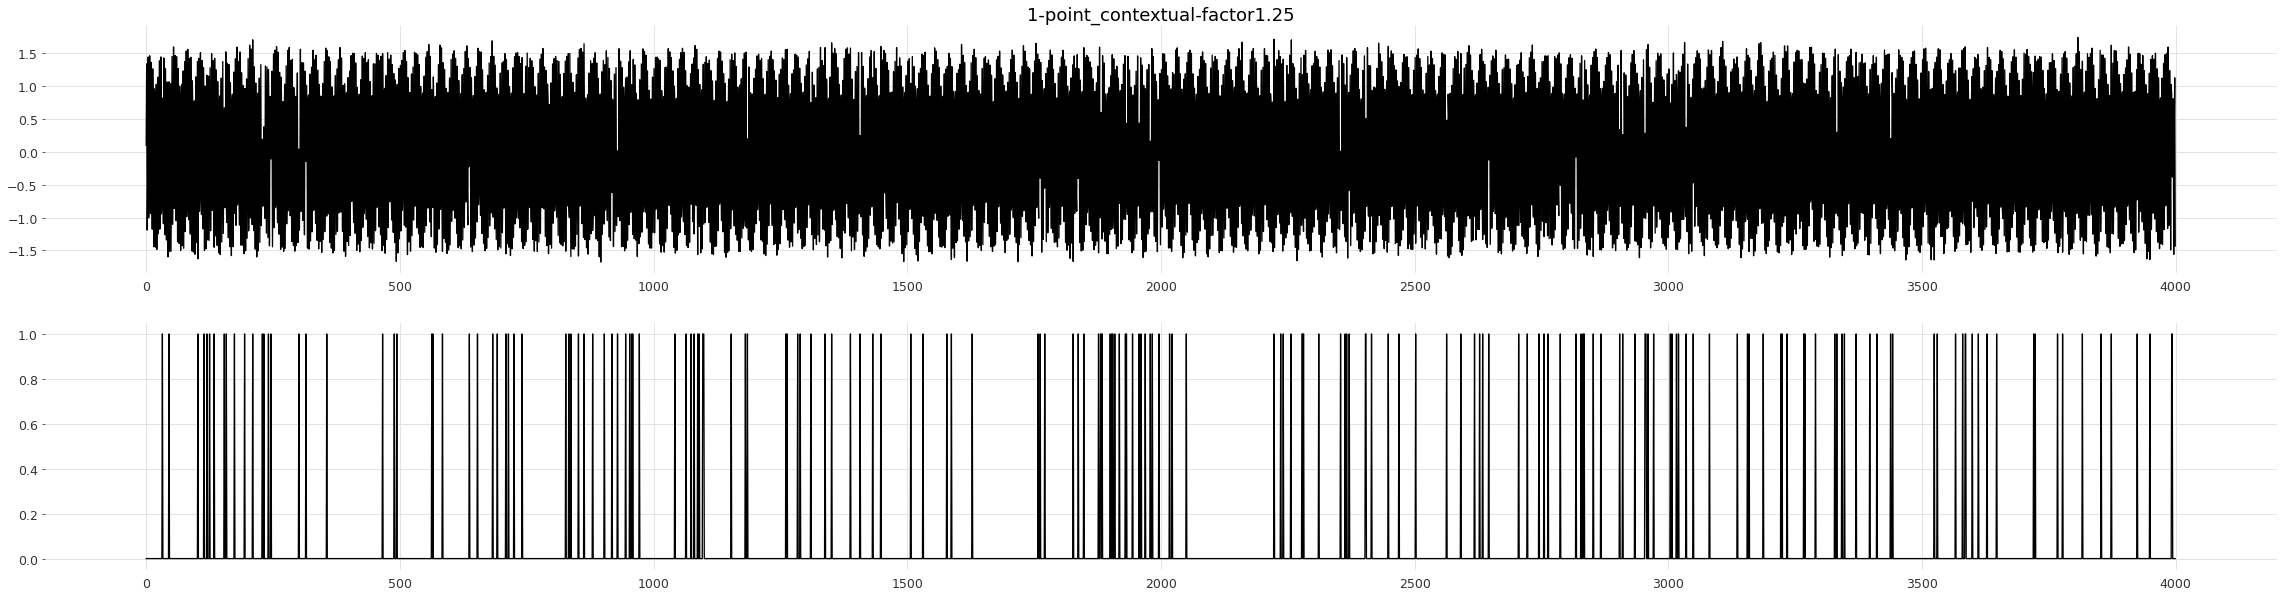

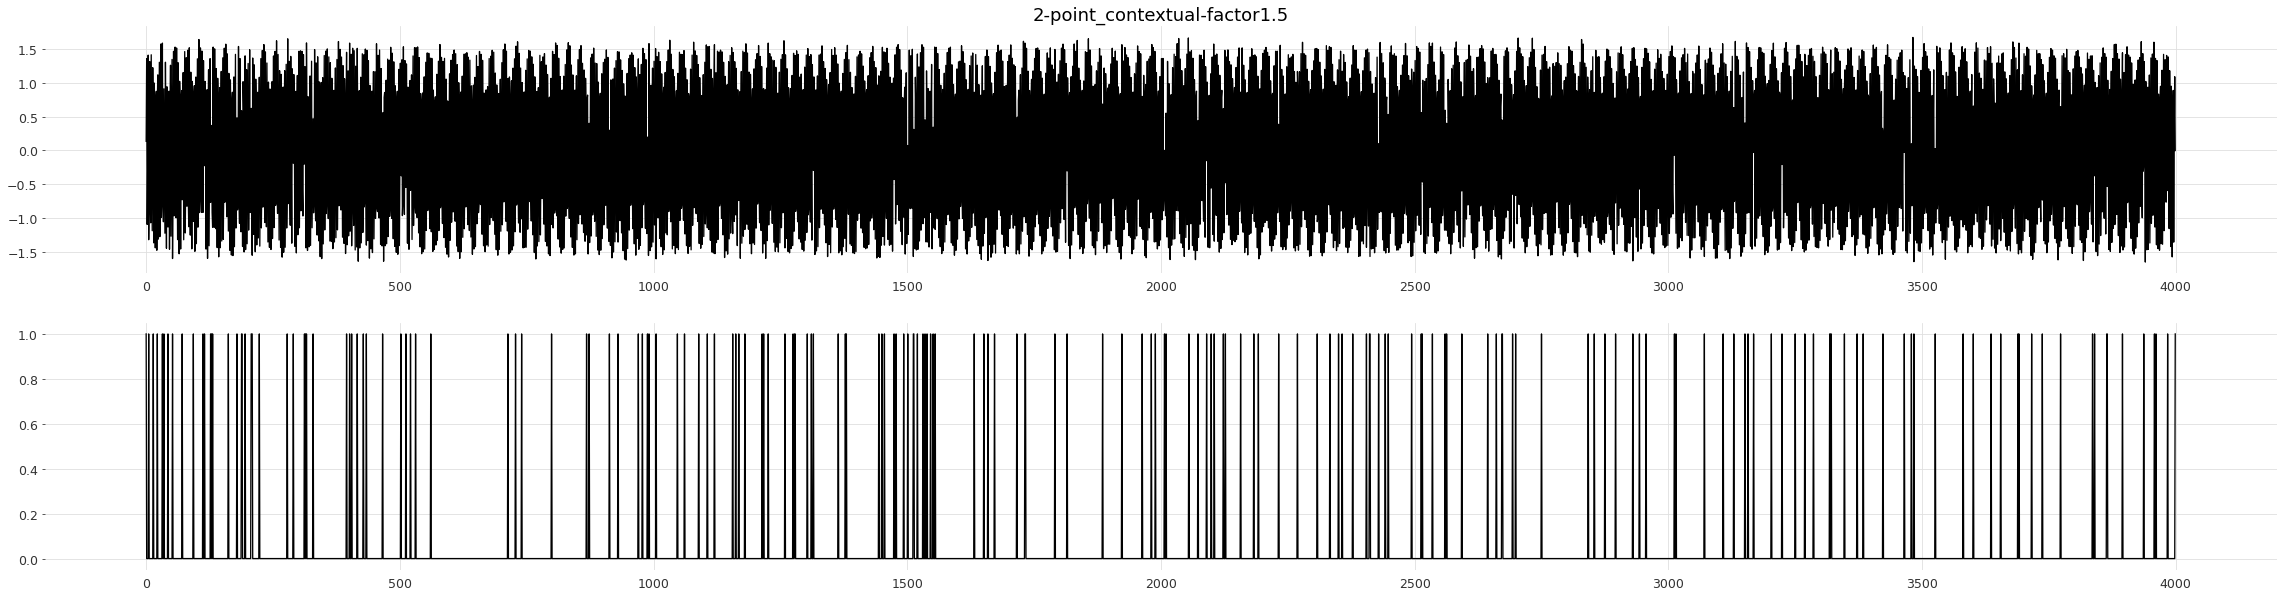

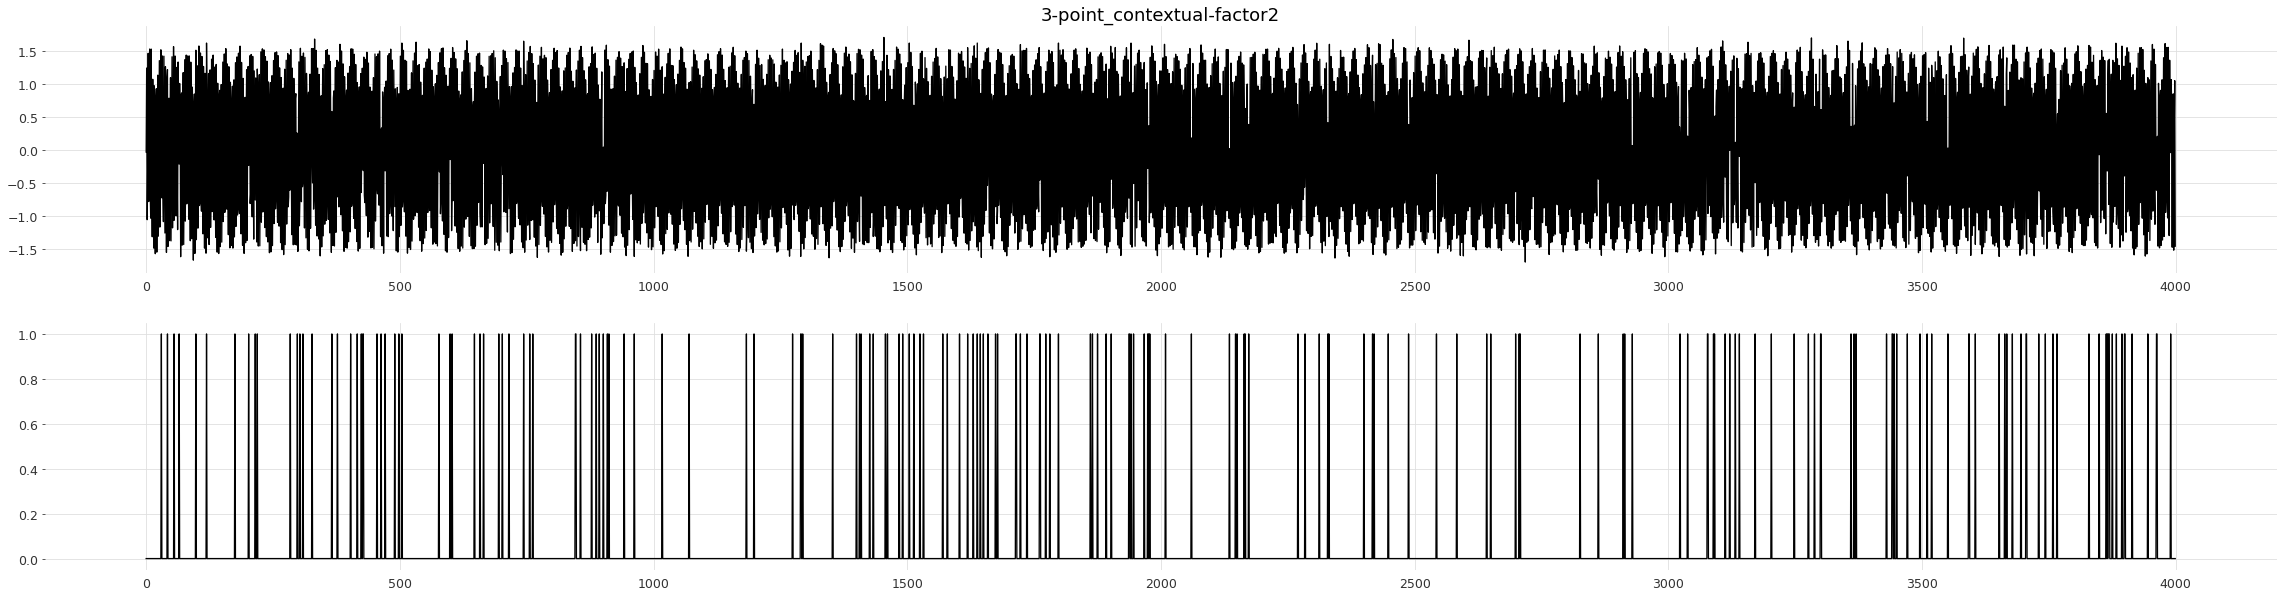

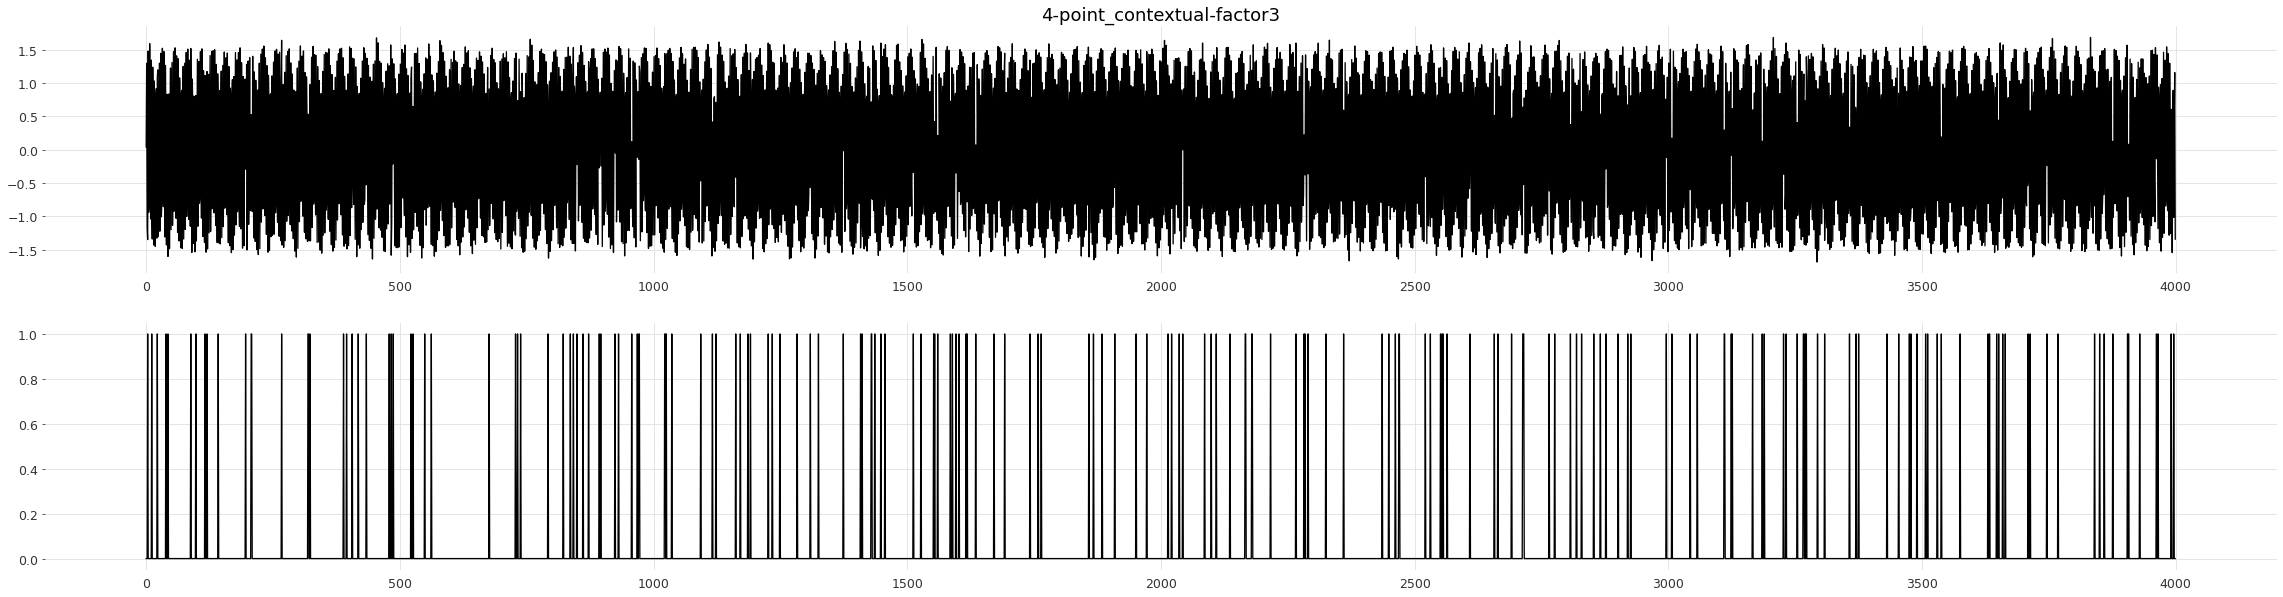

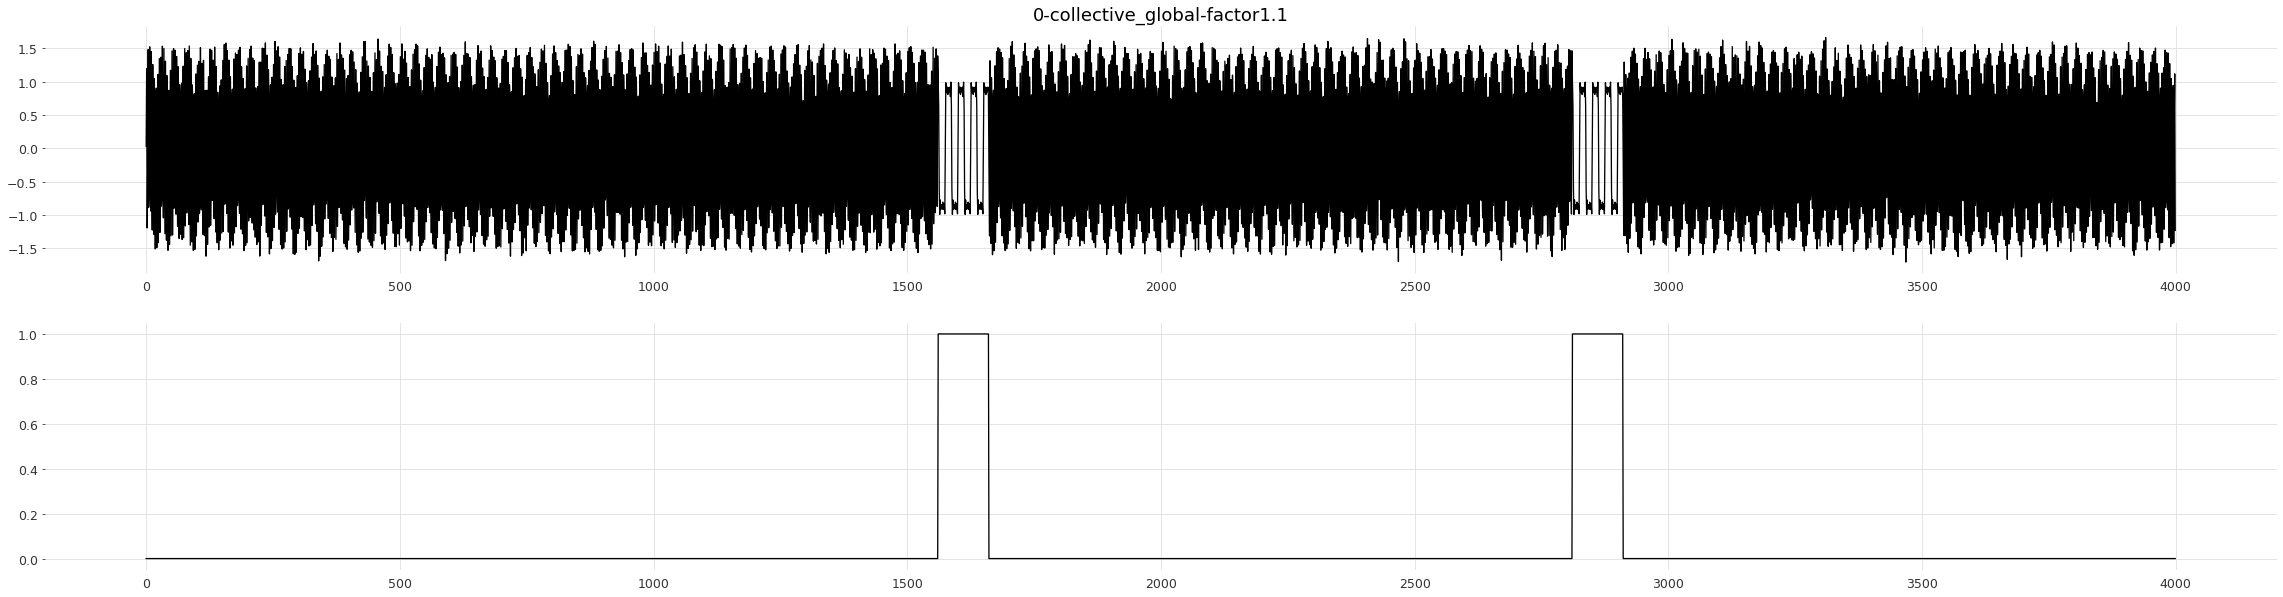

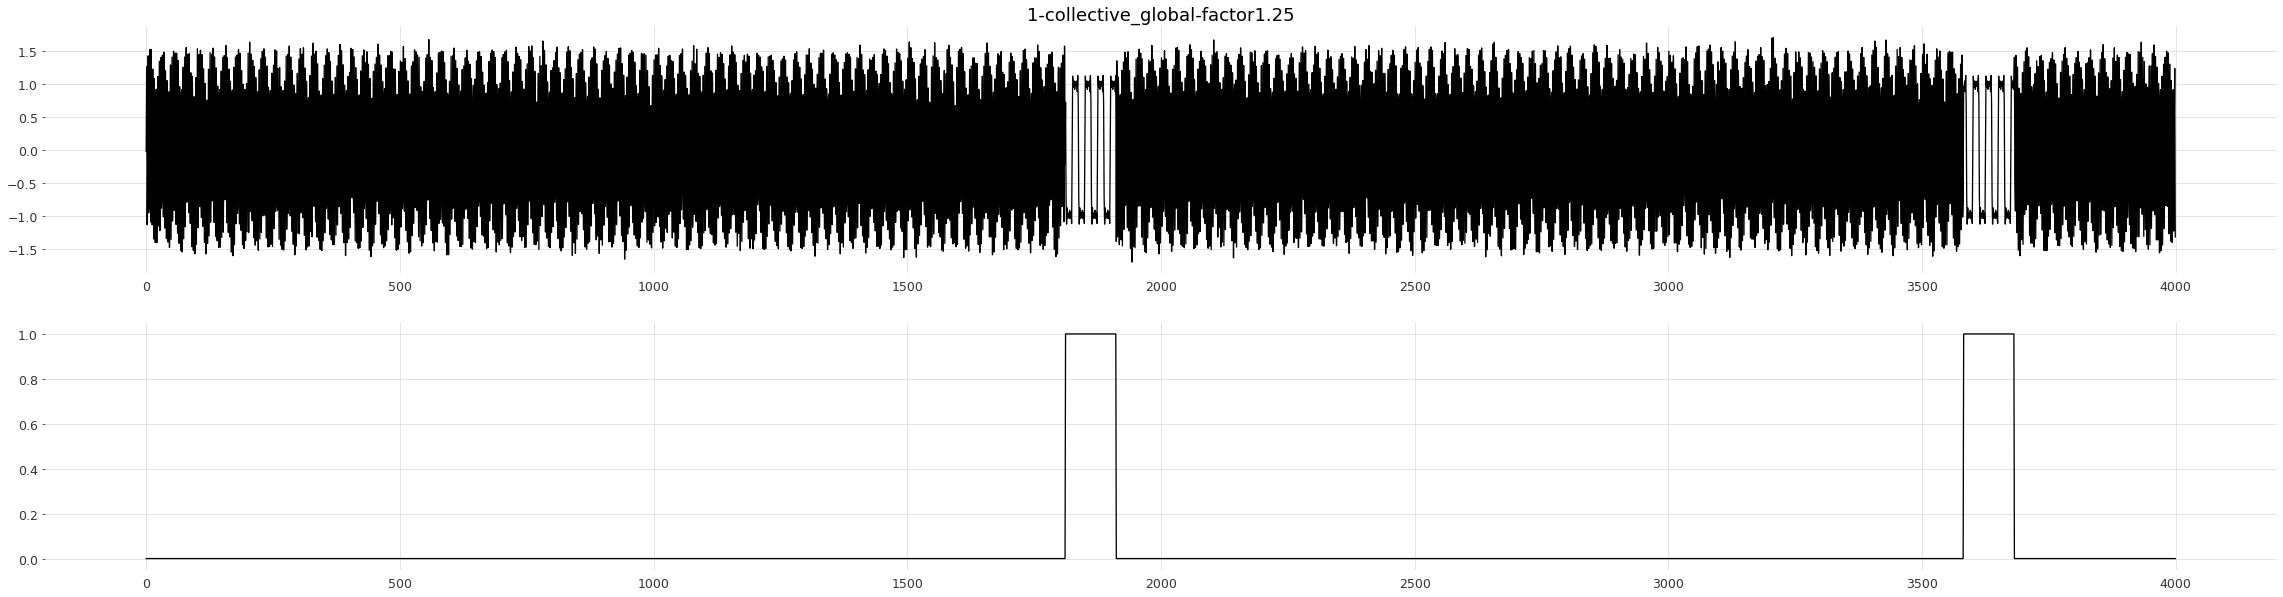

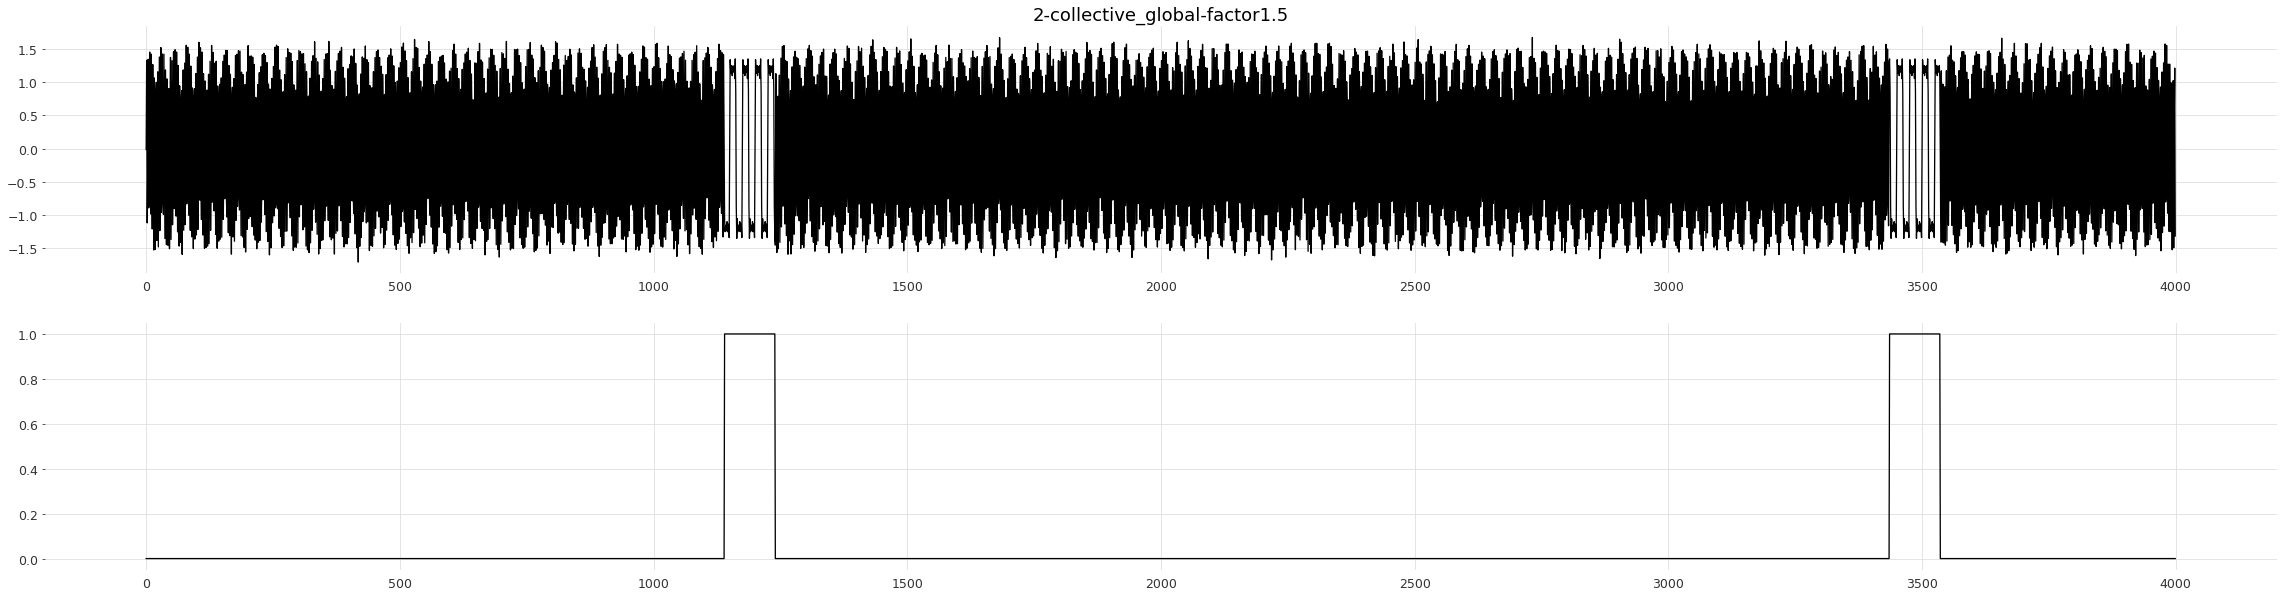

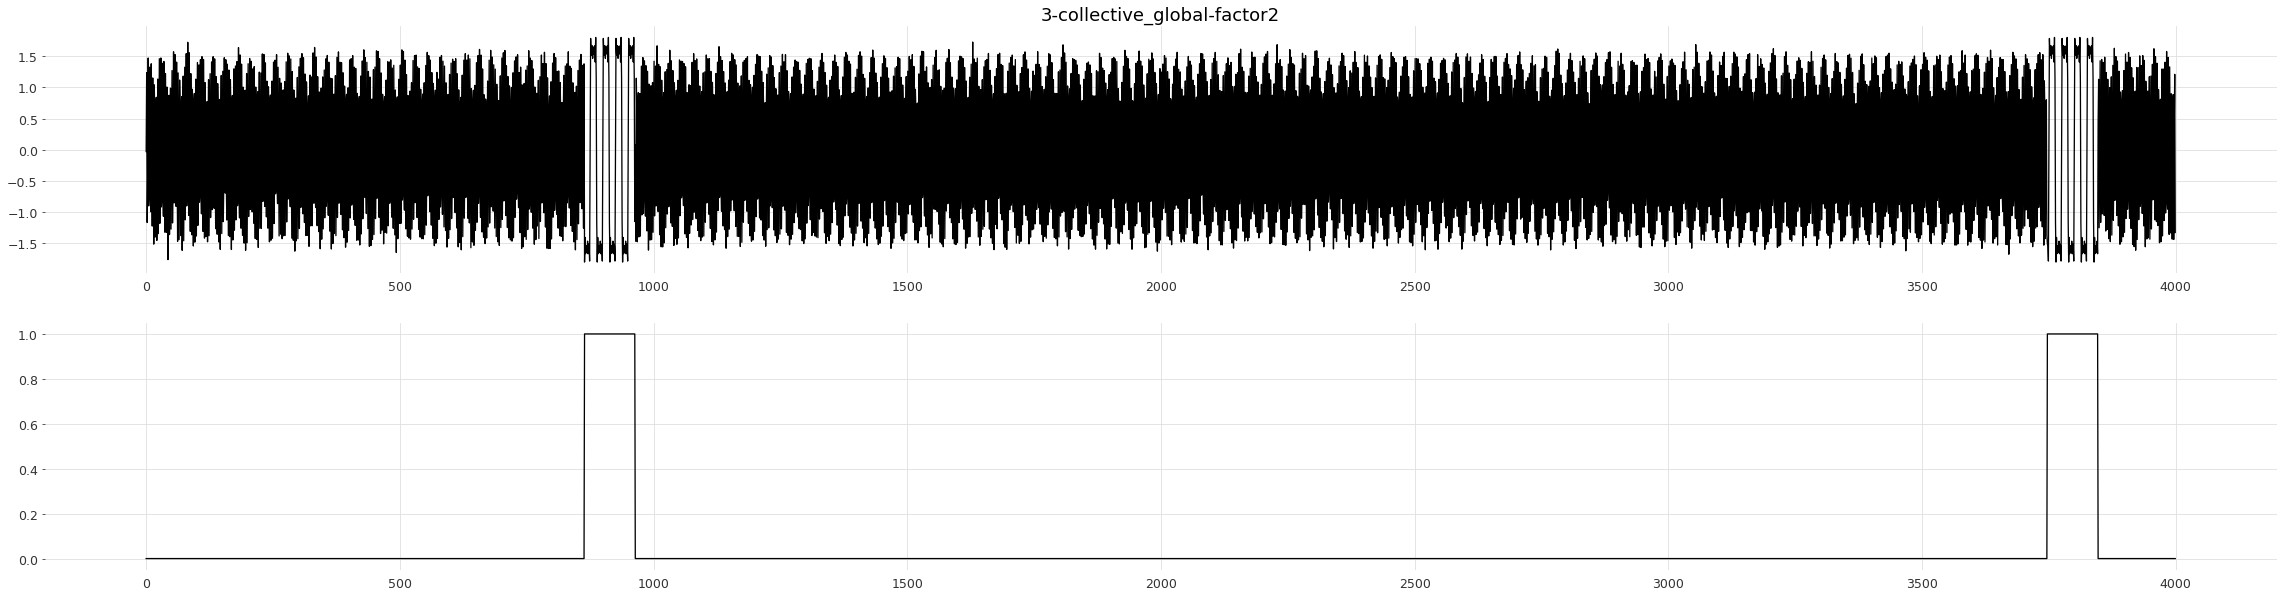

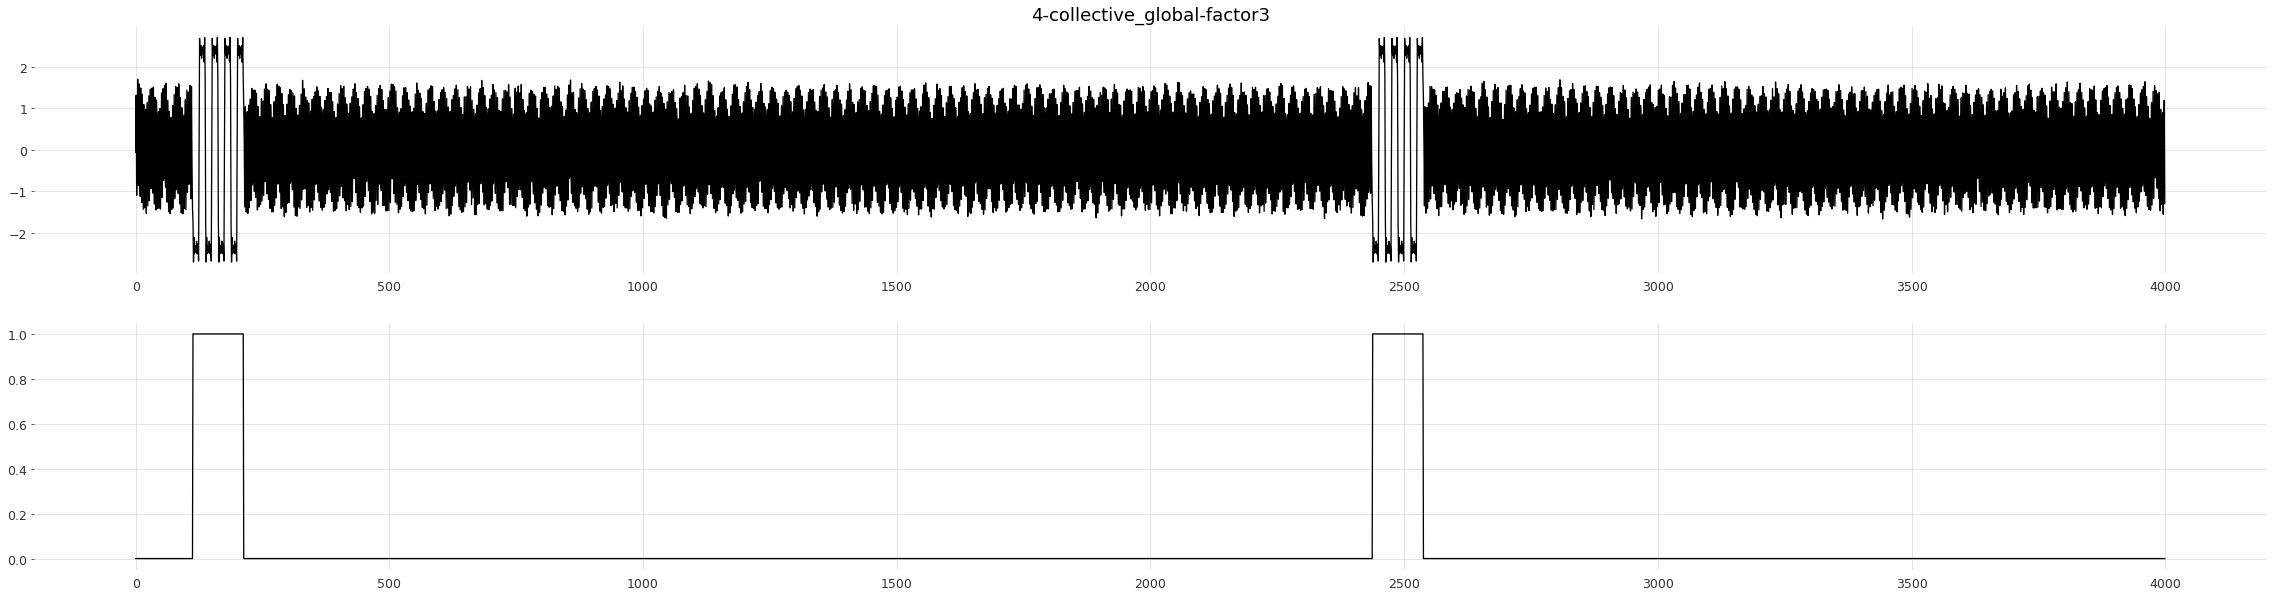

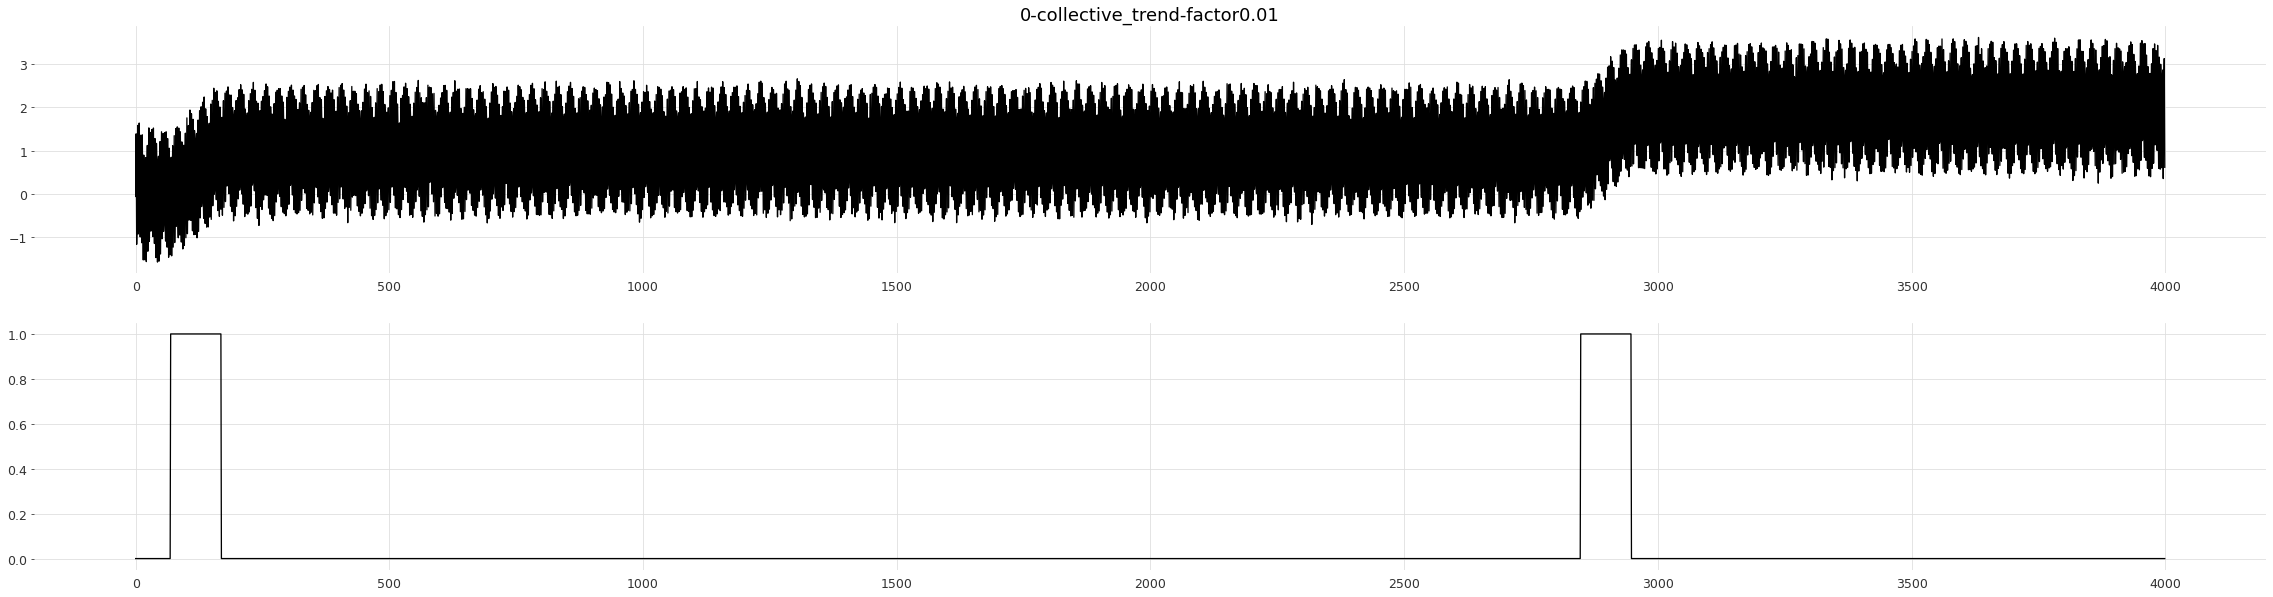

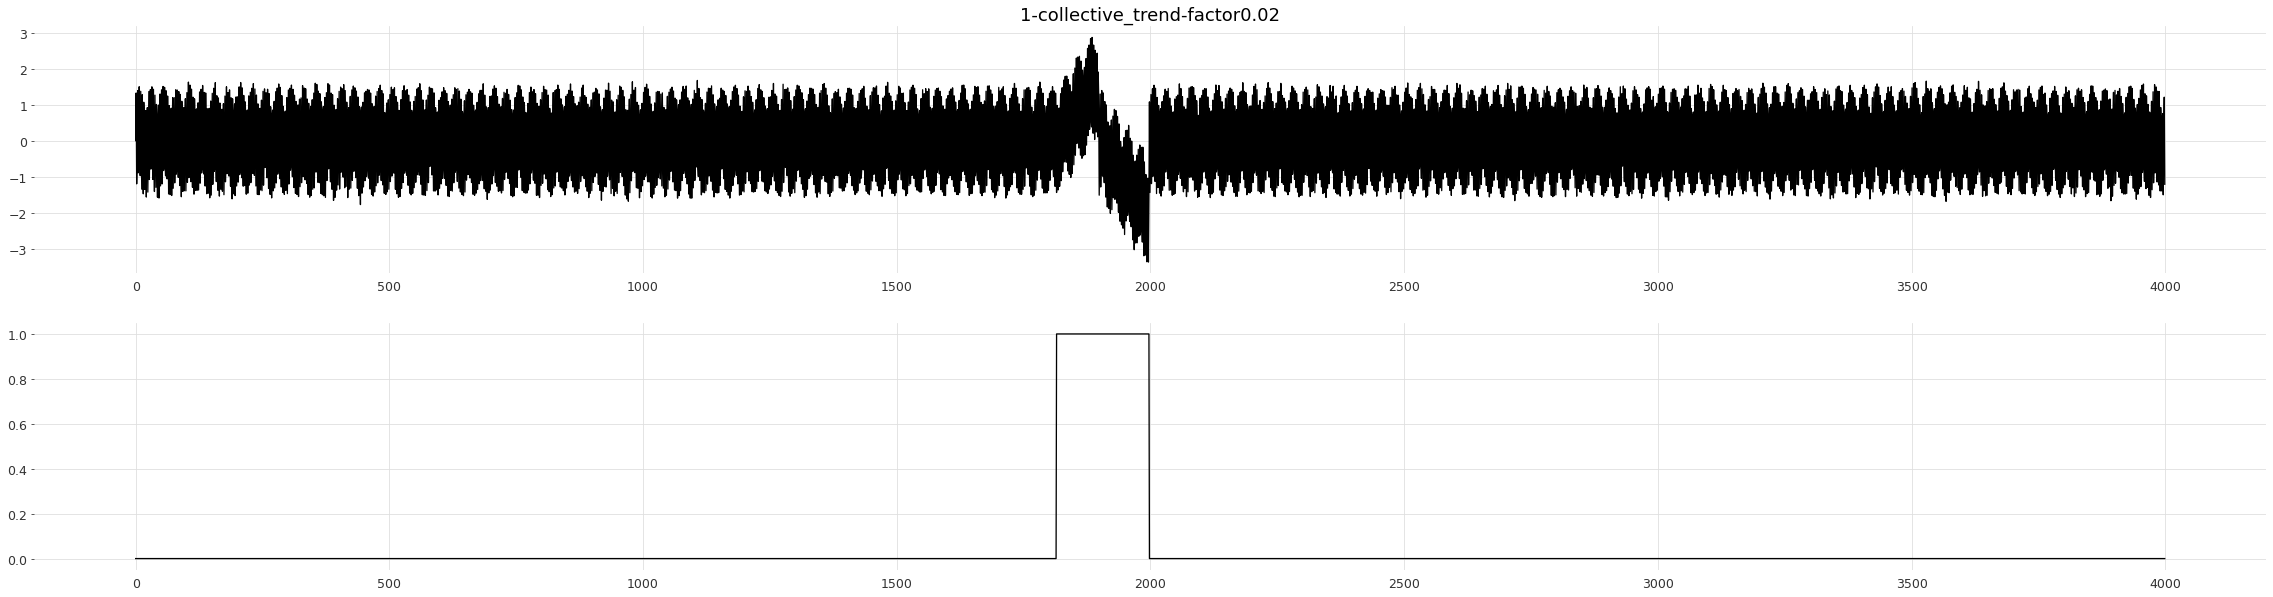

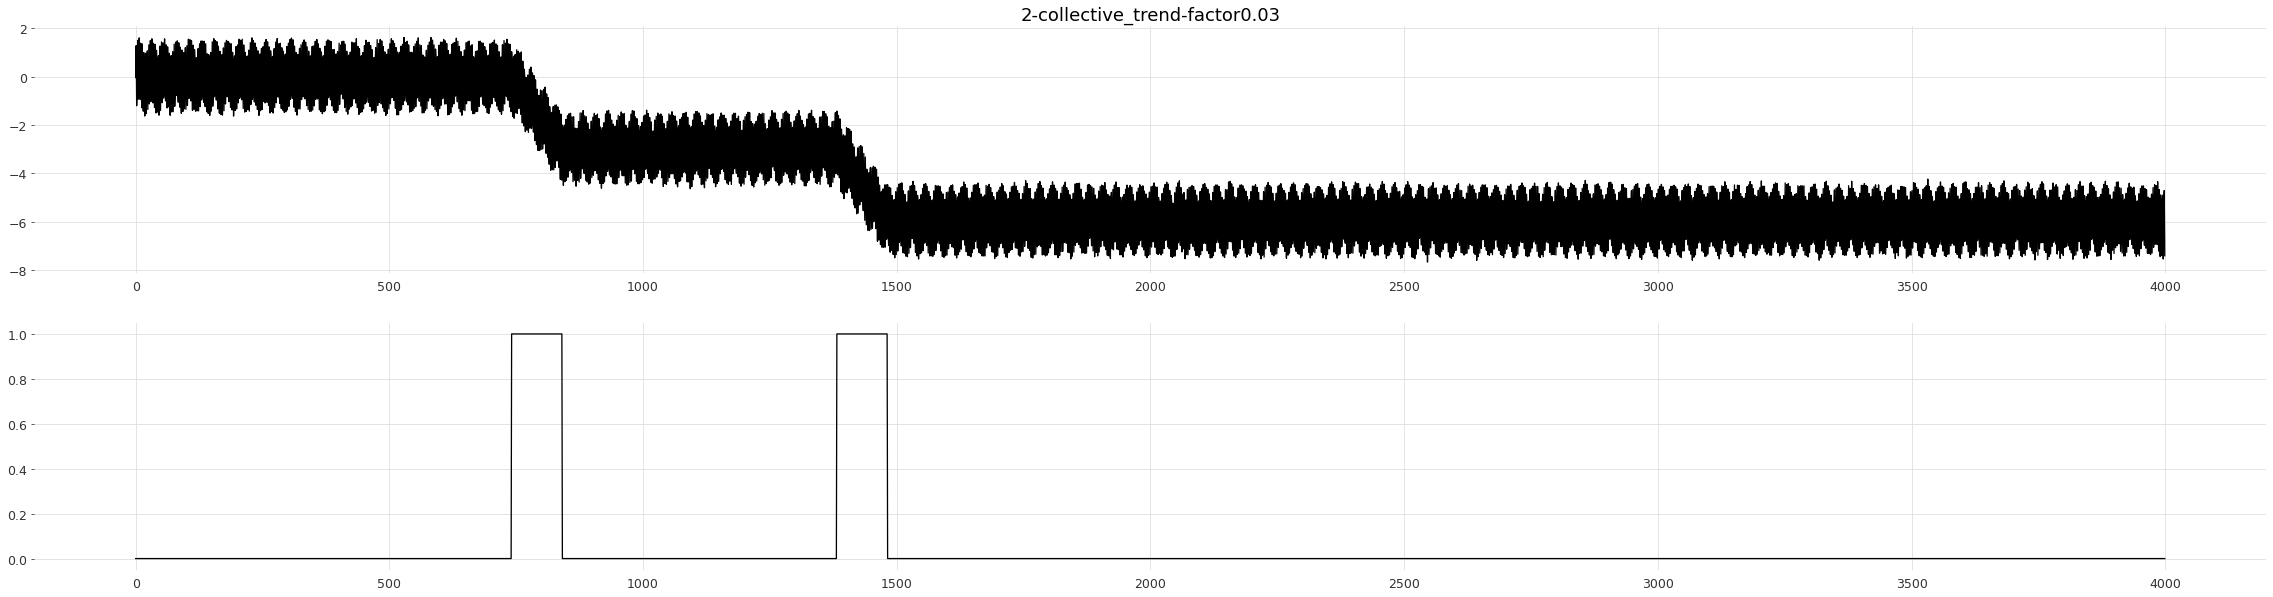

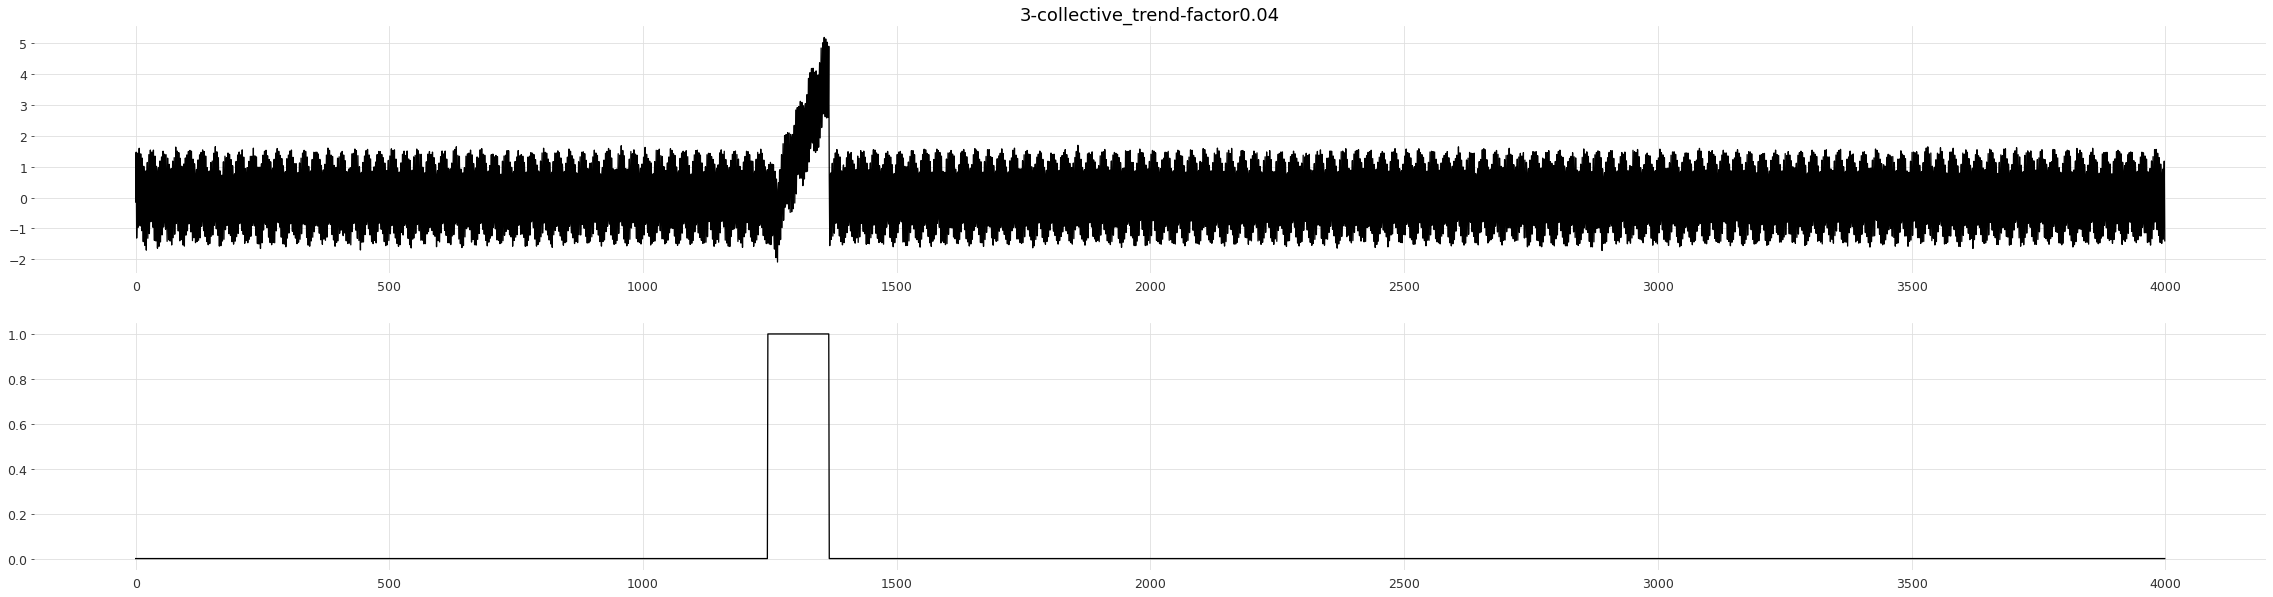

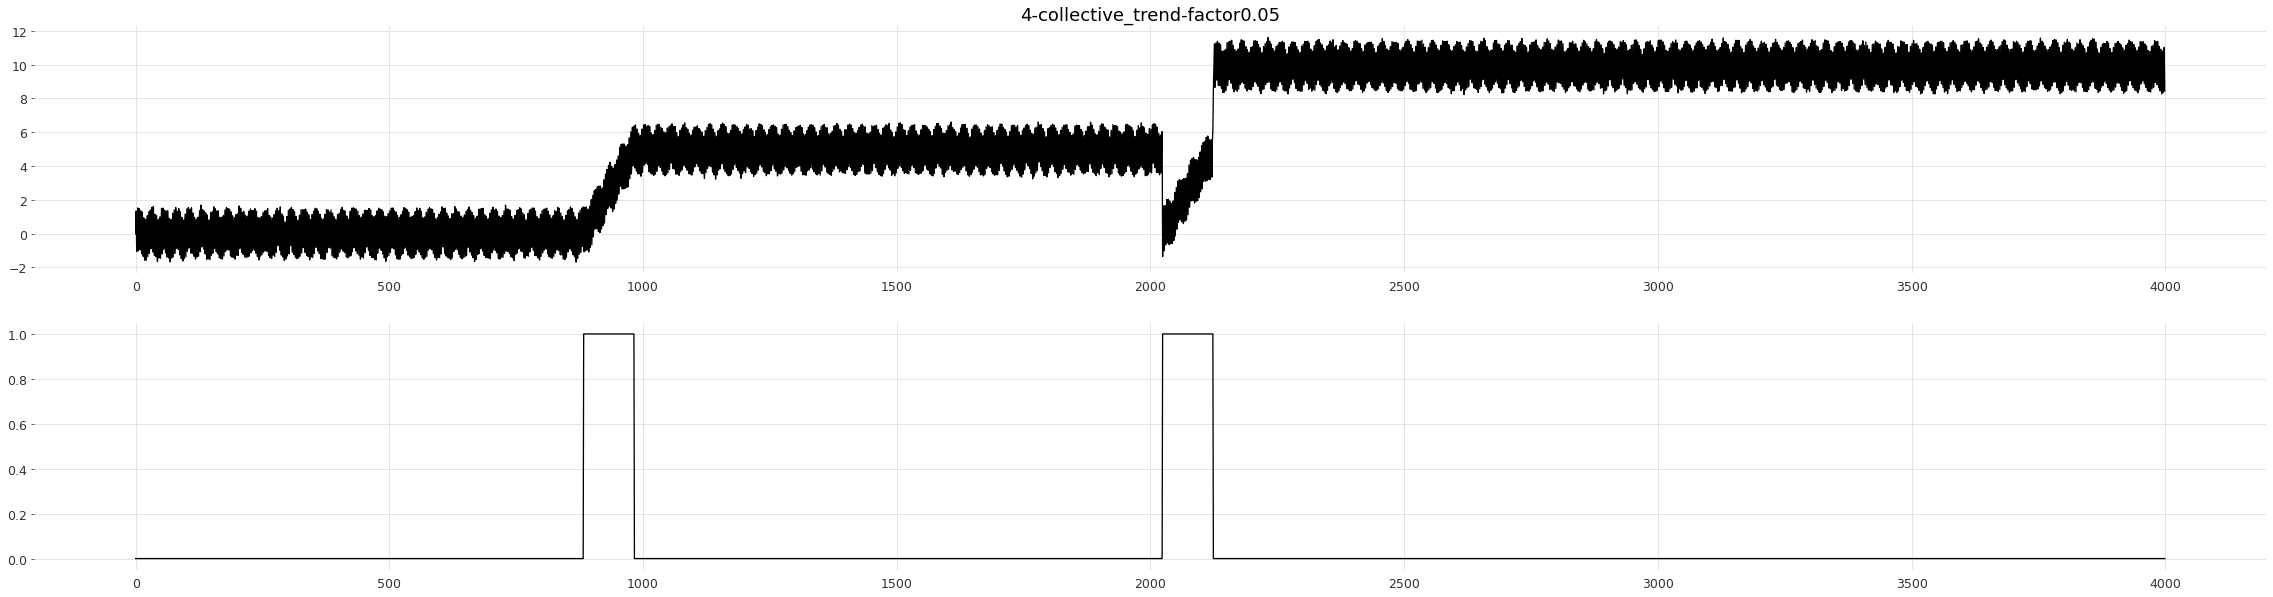

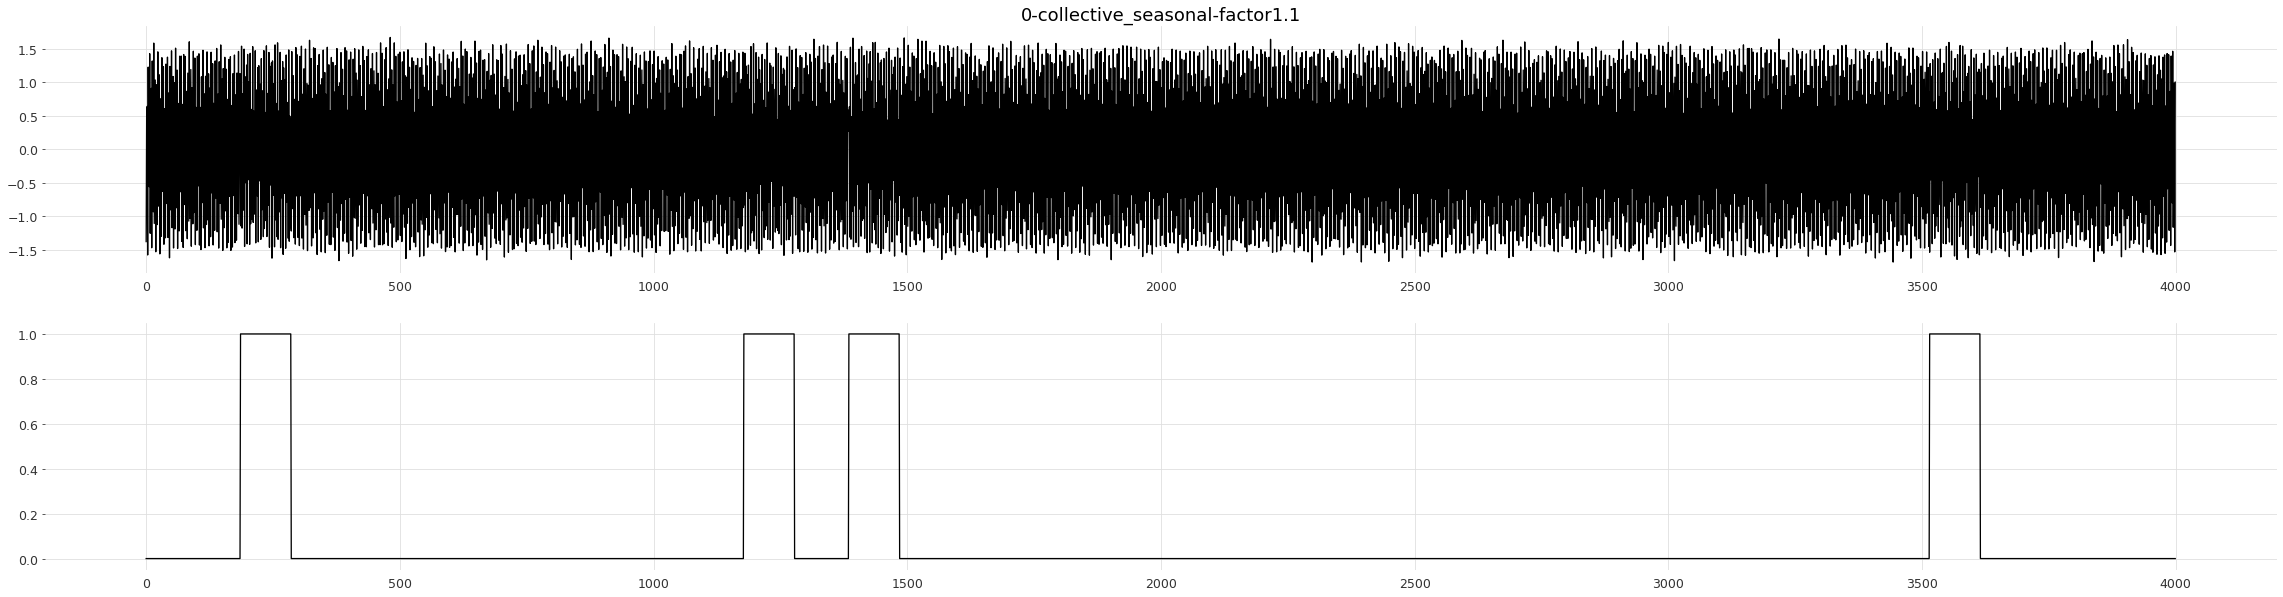

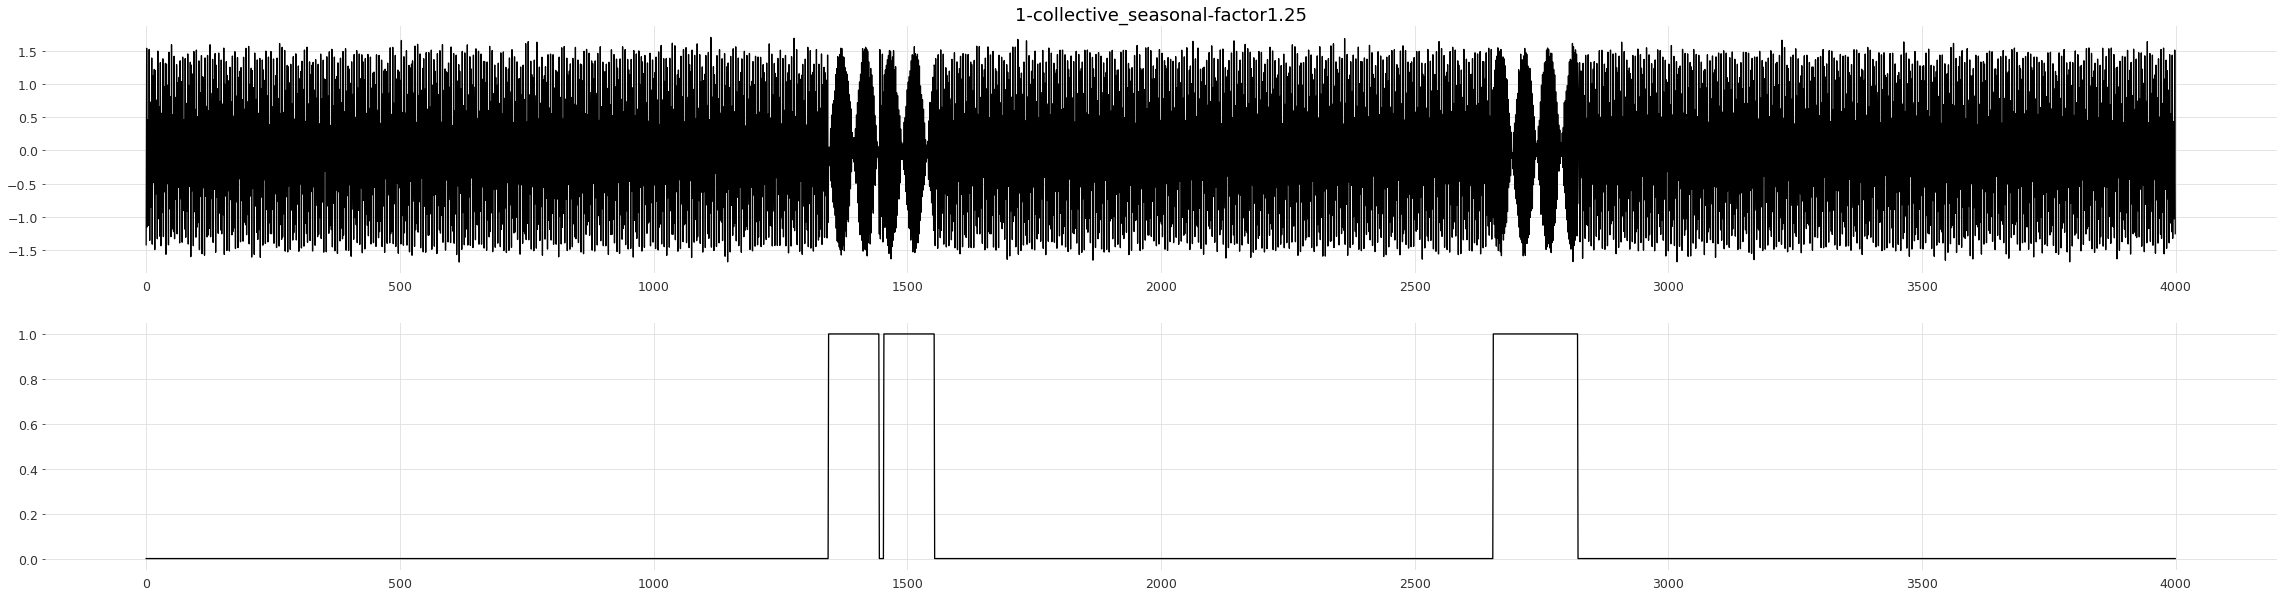

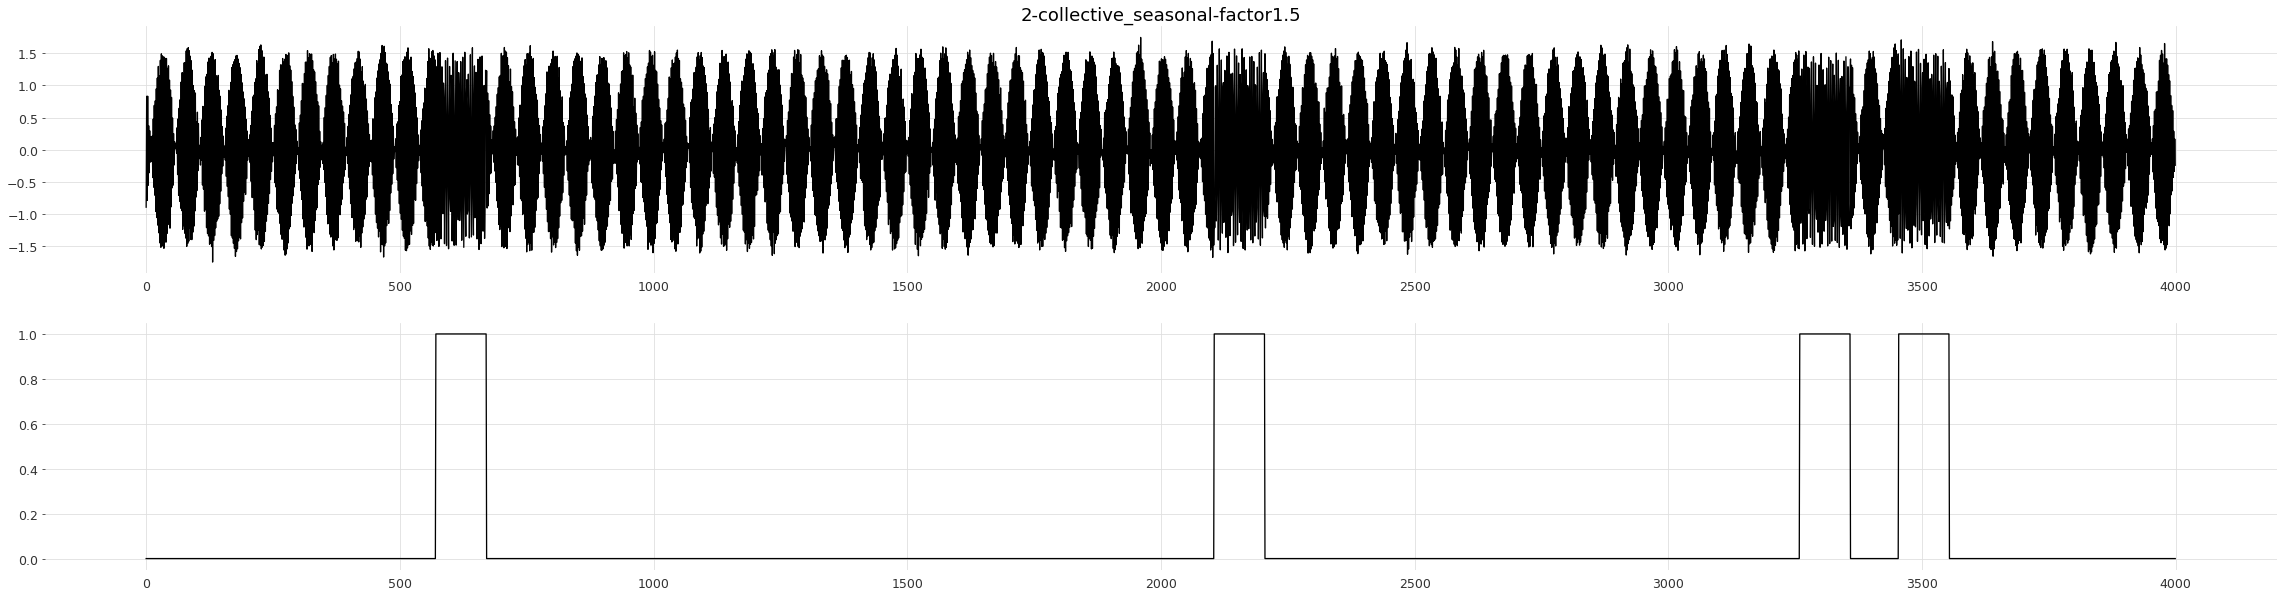

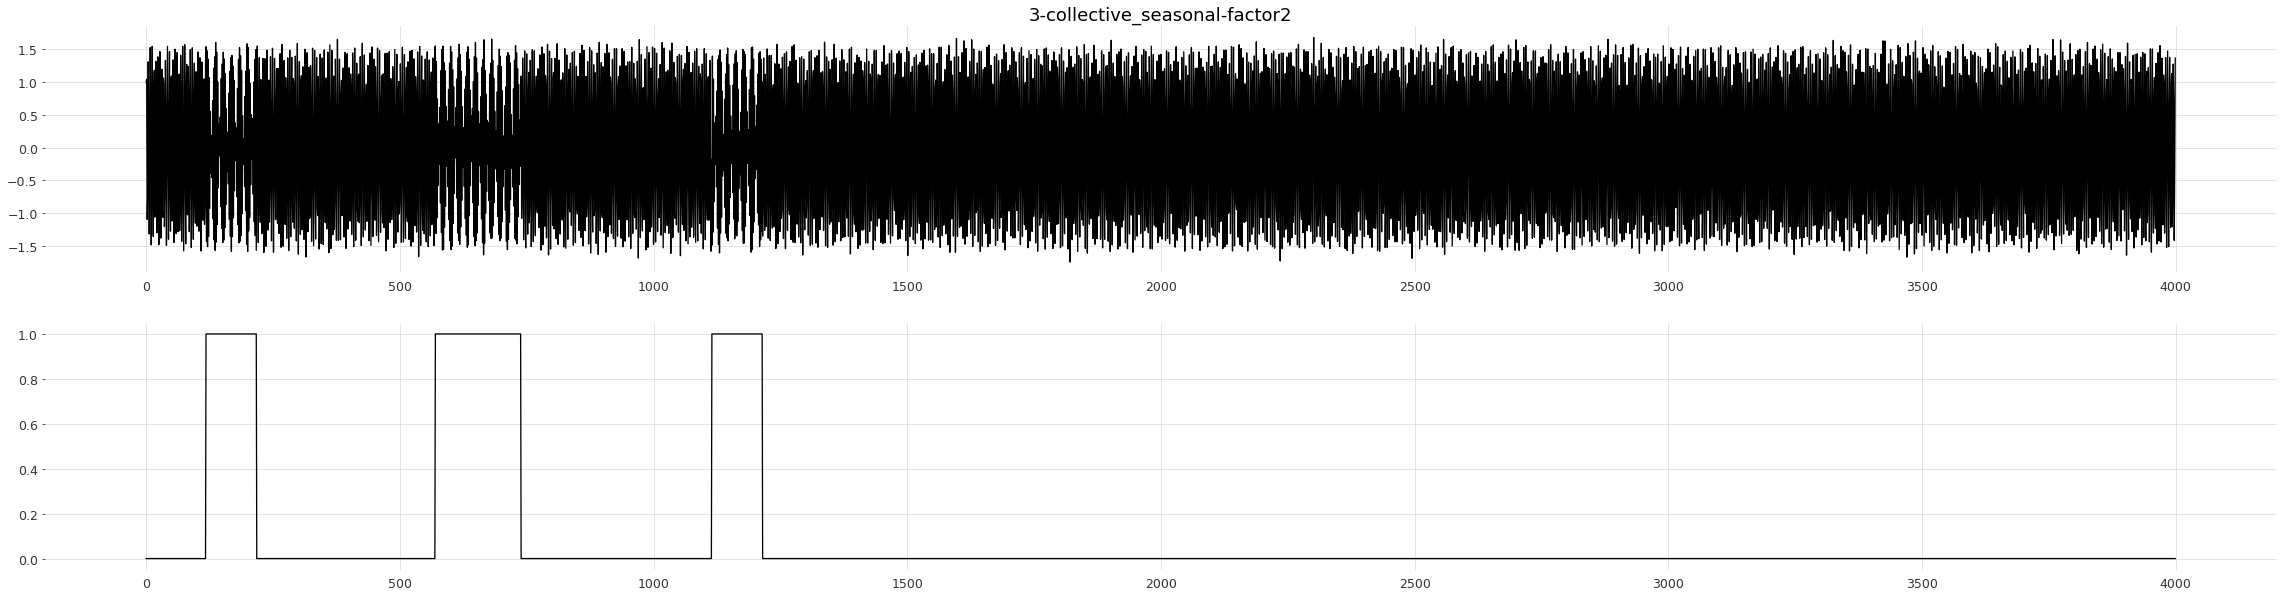

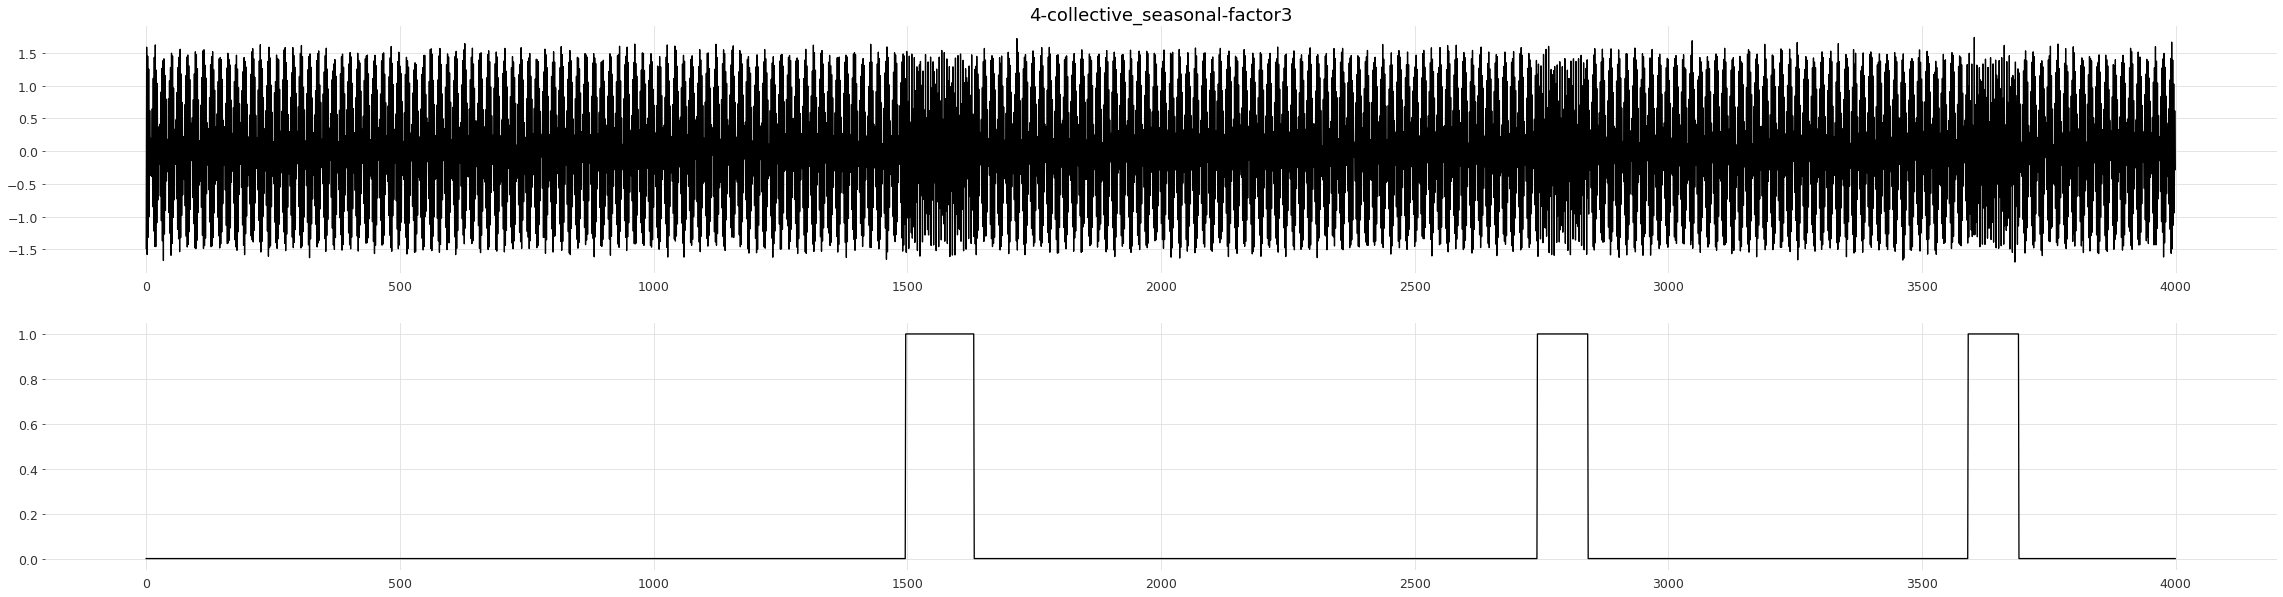

In [101]:
for path in PATHS:
    file_list = ["-".join(f.split("-")[:-1]) for f in get_files_from_path(path) if "train" in f]
    
    for f in file_list:
        test = np.loadtxt(path+f+"-test.txt")
        labels = np.loadtxt(path+f+"-labels.txt")
        
        fig, axes = plt.subplots(2)
        axes[0].set_title(f)
        axes[0].plot(test)
        axes[1].plot(labels)

# Run Experiments

## Baselines

In [4]:
PATH0 = "./data/univar-synth/point_global/"
PATH1 = "./data/univar-synth/point_contextual/"
PATH2 = "./data/univar-synth/collective_global/"
PATH3 = "./data/univar-synth/collective_trend/"
PATH4 = "./data/univar-synth/collective_seasonal/"

In [5]:
PATHS = [PATH0, PATH1, PATH2, PATH3, PATH4]

In [106]:
SAVE_DIR = "./results/univar-synth/untuned/"

In [250]:
class ScoreCounter:
    def __init__(self):
        self.tp = 0
        self.fp = 0
        self.tn = 0
        self.fn = 0
        
    def process(self, preds, labels):
        preds = preds.copy()
        labels = labels.copy()
        ground_truth_ones = np.where(labels == 1)[0]
        pred_ones = np.where(preds == 1)[0]
        
        ranges = self._consecutive(ground_truth_ones)
        
        tp, fp, tn, fn = 0, 0, 0, 0
        
        for r in ranges:
            intersect = np.intersect1d(r, pred_ones, assume_unique=True)
            if intersect.size != 0:
                tp += r.size
                preds[intersect] = 0
                pred_ones = np.where(preds == 1)[0]
            else:
                fn += r.size
            
        fp += pred_ones.size
        tn += preds.size - tp - fp - fn
        
        self.tp += tp
        self.fp += fp
        self.tn += tn
        self.fn += fn
        
        
        return
        
        
    def _consecutive(self, data, stepsize=1):
        return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)
    
    
    @property
    def tpr(self):
        return self.tp/(self.fn+self.tp)
    
    @property
    def fpr(self):
        return self.fp/(self.tn+self.fp)
    
    @property
    def tnr(self):
        return self.tn/(self.tn+self.fp)
        
    @property
    def fnr(self):
        return self.fn/(self.fn+self.tp)
        
    @property
    def precision(self):
        return self.tp/(self.tp+self.fp)
    
    @property
    def recall(self):
        return self.tp/(self.tp+self.fn)
    
    @property
    def f1(self):
        return (2*self.precision*self.recall)/(self.precision+self.recall)
    
    

In [254]:
# Quantile Model
for path in PATHS:
    file_list = ["-".join(f.split("-")[:-1]) for f in get_files_from_path(path) if "train" in f]
    scorer = ScoreCounter()
    for f in file_list:
        train = np.loadtxt(path+f+"-train.txt")
        test = np.loadtxt(path+f+"-test.txt")
        labels = np.loadtxt(path+f+"-labels.txt")

        window = 500
        test_extend = np.concatenate((train[-window:], test))
        model = QuantileModel(window)
        scores = model.get_scores(test_extend)[window:] 
        
        save = SAVE_DIR+"quantile/"+f
        os.makedirs(SAVE_DIR+"quantile/", exist_ok=True)
        np.savetxt(save+"-scores.txt", scores)
        np.savetxt(save+"-preds.txt", scores)
        
        scorer.process(scores, labels)
       
    print(f"{scorer.tp}, {scorer.fp}, {scorer.tn}, {scorer.fn}, {scorer.tpr}, {scorer.fpr}, {scorer.tnr}, {scorer.fnr}, {scorer.precision}, {scorer.recall}, {scorer.f1}")
    

350, 53, 18975, 622, 0.360082304526749, 0.002785368929997898, 0.9972146310700021, 0.6399176954732511, 0.8684863523573201, 0.360082304526749, 0.509090909090909
57, 376, 18645, 922, 0.05822267620020429, 0.019767625256295673, 0.9802323747437043, 0.9417773237997957, 0.13163972286374134, 0.05822267620020429, 0.08073654390934845
400, 381, 18619, 600, 0.4, 0.020052631578947367, 0.9799473684210527, 0.6, 0.5121638924455826, 0.4, 0.4491858506457047
704, 497, 18599, 200, 0.7787610619469026, 0.026026392961876834, 0.9739736070381232, 0.22123893805309736, 0.5861781848459617, 0.7787610619469026, 0.6688836104513064
1671, 388, 17741, 200, 0.8931052912880812, 0.021402173313475648, 0.9785978266865244, 0.10689470871191876, 0.8115590092277805, 0.8931052912880812, 0.850381679389313


In [257]:
# Moving Average Model
for path in PATHS:
    file_list = ["-".join(f.split("-")[:-1]) for f in get_files_from_path(path) if "train" in f]
    scorer = ScoreCounter()
    for f in file_list:
        train = np.loadtxt(path+f+"-train.txt")
        test = np.loadtxt(path+f+"-test.txt")
        labels = np.loadtxt(path+f+"-labels.txt")

        window = 50
        test_extend = np.concatenate((train[-window:], test))
        model = MovingAverageModel(window)
        scores = model.get_scores(test_extend)[window:] 

        # Get threshold (Not needed for Quantile)
        thres = pot(scores, 1e-1, 0.9)
        
        preds = scores.copy()
        preds[preds <= thres] = 0
        preds[preds > thres] = 1
        
        save = SAVE_DIR+"ma/"+f
        os.makedirs(SAVE_DIR+"ma/", exist_ok=True)
        np.savetxt(save+"-scores.txt", scores)
        np.savetxt(save+"-preds.txt", preds)
        
        scorer.process(preds, labels)

    print(f"{scorer.tp}, {scorer.fp}, {scorer.tn}, {scorer.fn}, {scorer.tpr}, {scorer.fpr}, {scorer.tnr}, {scorer.fnr}, {scorer.precision}, {scorer.recall}, {scorer.f1}")

476, 1543, 17485, 496, 0.4897119341563786, 0.0810910237544671, 0.9189089762455329, 0.5102880658436214, 0.2357602773650322, 0.4897119341563786, 0.3182881979271147
99, 1905, 17116, 880, 0.10112359550561797, 0.10015246306713632, 0.8998475369328637, 0.898876404494382, 0.04940119760479042, 0.10112359550561797, 0.06637613141133088
600, 1817, 17183, 400, 0.6, 0.09563157894736841, 0.9043684210526316, 0.4, 0.24824162184526272, 0.6, 0.3511852502194908
804, 1825, 17271, 100, 0.8893805309734514, 0.09556975282781735, 0.9044302471721827, 0.11061946902654868, 0.3058197033092431, 0.8893805309734514, 0.4551372771016134
1871, 1813, 16316, 0, 1.0, 0.10000551602404986, 0.8999944839759502, 0.0, 0.507871878393051, 1.0, 0.6736273627362737


In [262]:
# ARIMA
for path in PATHS:
    file_list = ["-".join(f.split("-")[:-1]) for f in get_files_from_path(path) if "train" in f]
    scorer = ScoreCounter()
    for f in file_list:
        train = np.loadtxt(path+f+"-train.txt")
        test = np.loadtxt(path+f+"-test.txt")
        labels = np.loadtxt(path+f+"-labels.txt")

        test_extend = np.concatenate((train[-window:], test))
        model = ARIMAModel(1,1,1)
        model.fit(train)
        scores = model.get_scores(test_extend)[window:] 

        # Get threshold (Not needed for Quantile)
        thres = pot(scores, 1e-1, 0.9)
        
        preds = scores.copy()
        preds[preds <= thres] = 0
        preds[preds > thres] = 1
        
        save = SAVE_DIR+"arima/"+f
        os.makedirs(SAVE_DIR+"arima/", exist_ok=True)
        np.savetxt(save+"-scores.txt", scores)
        np.savetxt(save+"-preds.txt", preds)
        
        scorer.process(preds, labels)

    print(f"{scorer.tp}, {scorer.fp}, {scorer.tn}, {scorer.fn}, {scorer.tpr}, {scorer.fpr}, {scorer.tnr}, {scorer.fnr}, {scorer.precision}, {scorer.recall}, {scorer.f1}")

688, 1323, 17705, 284, 0.7078189300411523, 0.06952911498843808, 0.9304708850115619, 0.29218106995884774, 0.34211834908005967, 0.7078189300411523, 0.46128059001005706
160, 1852, 17169, 819, 0.1634320735444331, 0.09736606908154145, 0.9026339309184586, 0.8365679264555669, 0.07952286282306163, 0.1634320735444331, 0.10698762955533267
1000, 1330, 17670, 0, 1.0, 0.07, 0.93, 0.0, 0.4291845493562232, 1.0, 0.6006006006006006
604, 1786, 17310, 300, 0.668141592920354, 0.09352744030163385, 0.9064725596983662, 0.33185840707964603, 0.25271966527196654, 0.668141592920354, 0.36672738312082576
1471, 1392, 16737, 400, 0.7862105825761625, 0.07678305477411881, 0.9232169452258812, 0.21378941742383753, 0.513796716730702, 0.7862105825761625, 0.6214617659484579


In [258]:
# IsolationForest
for path in PATHS:
    file_list = ["-".join(f.split("-")[:-1]) for f in get_files_from_path(path) if "train" in f]
    scorer = ScoreCounter()
    for f in file_list:
        train = np.loadtxt(path+f+"-train.txt")
        test = np.loadtxt(path+f+"-test.txt")
        labels = np.loadtxt(path+f+"-labels.txt")

        model = IsolationForestModel()
        model.fit(train)
        scores = model.get_scores(test)
            
        # Get threshold (Not needed for Quantile)
        thres = pot(scores, 1e-1, 0.9)
       
        # Get predictions from threshold
        preds = scores.copy()
        preds[preds <= thres] = 0
        preds[preds > thres] = 1
        
        # Save results
        save = SAVE_DIR+"iforest/"+f
        os.makedirs(SAVE_DIR+"iforest/", exist_ok=True)
        np.savetxt(save+"-scores.txt", scores)
        np.savetxt(save+"-preds.txt", preds)


        scorer.process(preds, labels)
       
    print(f"{scorer.tp}, {scorer.fp}, {scorer.tn}, {scorer.fn}, {scorer.tpr}, {scorer.fpr}, {scorer.tnr}, {scorer.fnr}, {scorer.precision}, {scorer.recall}, {scorer.f1}")

972, 988, 18040, 0, 1.0, 0.05192348118562119, 0.9480765188143788, 0.0, 0.4959183673469388, 1.0, 0.6630286493860846
169, 1838, 17183, 810, 0.17262512768130744, 0.096630040481573, 0.903369959518427, 0.8273748723186926, 0.08420528151469855, 0.17262512768130744, 0.11319490957803081
400, 1659, 17341, 600, 0.4, 0.08731578947368421, 0.9126842105263158, 0.6, 0.1942690626517727, 0.4, 0.2615233736515201


/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)


304, 652, 18444, 600, 0.336283185840708, 0.03414327607875995, 0.96585672392124, 0.6637168141592921, 0.3179916317991632, 0.336283185840708, 0.32688172043010755
1871, 1778, 16351, 0, 1.0, 0.09807490760659716, 0.9019250923934028, 0.0, 0.5127432173198136, 1.0, 0.6778985507246377


In [261]:
# RegressionModel
for path in PATHS:
    file_list = ["-".join(f.split("-")[:-1]) for f in get_files_from_path(path) if "train" in f]
    scorer = ScoreCounter()
    for f in file_list:
        train = np.loadtxt(path+f+"-train.txt")
        test = np.loadtxt(path+f+"-test.txt")
        labels = np.loadtxt(path+f+"-labels.txt")
        
        window = 10
        
        test_extend = np.concatenate((train[-window:], test))
        model = RegressionModel(window)
        model.fit(train)
        scores = model.get_scores(test_extend)[0]
        
        
        # Get threshold (Not needed for Quantile)
        thres = pot(scores, 1e-1, 0.90)
        
        # Get predictions from threshold
        preds = scores.copy()
        preds[preds <= thres] = 0
        preds[preds > thres] = 1
        
        # Save results
        save = SAVE_DIR+"regression/"+f
        os.makedirs(SAVE_DIR+"regression/", exist_ok=True)
        np.savetxt(save+"-scores.txt", scores)
        np.savetxt(save+"-preds.txt", preds)

        scorer.process(preds, labels)

    print(f"{scorer.tp}, {scorer.fp}, {scorer.tn}, {scorer.fn}, {scorer.tpr}, {scorer.fpr}, {scorer.tnr}, {scorer.fnr}, {scorer.precision}, {scorer.recall}, {scorer.f1}")

687, 1326, 17702, 285, 0.7067901234567902, 0.06968677738070213, 0.9303132226192978, 0.2932098765432099, 0.3412816691505216, 0.7067901234567902, 0.46030150753768845
160, 1853, 17168, 819, 0.1634320735444331, 0.09741864255296777, 0.9025813574470323, 0.8365679264555669, 0.07948335817188276, 0.1634320735444331, 0.10695187165775402
1000, 1326, 17674, 0, 1.0, 0.06978947368421053, 0.9302105263157895, 0.0, 0.4299226139294927, 1.0, 0.6013229104028863
404, 1811, 17285, 500, 0.4469026548672566, 0.09483661499790531, 0.9051633850020947, 0.5530973451327433, 0.18239277652370203, 0.4469026548672566, 0.2590573901891632
1471, 1387, 16742, 400, 0.7862105825761625, 0.07650725357162558, 0.9234927464283744, 0.21378941742383753, 0.5146955913226032, 0.7862105825761625, 0.6221188411926412


## F1 Tuned

In [3]:
from one.models import *
from one.utils import *
from one.scorer.pot import *
from numpy.lib.stride_tricks import sliding_window_view   

In [4]:
PATH0 = "./data/univar-synth/point_global/"
PATH1 = "./data/univar-synth/point_contextual/"
PATH2 = "./data/univar-synth/collective_global/"
PATH3 = "./data/univar-synth/collective_trend/"
PATH4 = "./data/univar-synth/collective_seasonal/"

In [5]:
PATHS = [PATH0, PATH1, PATH2, PATH3, PATH4]

In [ ]:
SAVE_DIR = "./results/univar-synth/f1tuned/"

In [267]:
optuna.logging.set_verbosity(optuna.logging.FATAL)

In [273]:
# Quantile Model
for path in PATHS:
    file_list = ["-".join(f.split("-")[:-1]) for f in get_files_from_path(path) if "train" in f]
    scorer = ScoreCounter()
    for f in file_list:
        train = np.loadtxt(path+f+"-train.txt")
        test = np.loadtxt(path+f+"-test.txt")
        labels = np.loadtxt(path+f+"-labels.txt")

        def objective(trial):
            s = ScoreCounter()
            window = trial.suggest_int("window", 100, 1000)
            threshold = trial.suggest_float("threshold", 0.95, 0.999)
            
            test_extend = np.concatenate((train[-window:], test))
            model = QuantileModel(window)
            scores = model.get_scores(test_extend)[window:] 
            
            s.process(scores, labels)
       
            if s.tp == 0 and s.fp == 0: return -1
            if s.tp == 0 and s.fn == 0: return -1

            if s.precision == 0 and s.recall == 0: return -1
            return s.f1
        
        study = optuna.create_study(direction="maximize")
        study.optimize(objective, n_trials=150)
       
        window = study.best_params["window"]
        threshold = study.best_params["threshold"]
        print(study.best_params)
        model = QuantileModel(window, threshold)
        
        test_extend = np.concatenate((train[-window:], test))
        
        scores = model.get_scores(test_extend)[window:] 

        scorer.process(scores, labels)

    print(f"{scorer.tp}, {scorer.fp}, {scorer.tn}, {scorer.fn}, {scorer.tpr}, {scorer.fpr}, {scorer.tnr}, {scorer.fnr}, {scorer.precision}, {scorer.recall}, {scorer.f1}")
       
    

{'window': 630, 'threshold': 0.9728086836481769}
{'window': 375, 'threshold': 0.9595286022921271}
{'window': 727, 'threshold': 0.9539369043906275}
{'window': 880, 'threshold': 0.9977816935477563}
{'window': 684, 'threshold': 0.9905658406756505}
362, 197, 18831, 610, 0.3724279835390947, 0.010353163758671432, 0.9896468362413285, 0.6275720164609053, 0.6475849731663685, 0.3724279835390947, 0.47289353363814507


KeyboardInterrupt: 

In [68]:
# MA Model 
for path in PATHS:
    file_list = ["-".join(f.split("-")[:-1]) for f in get_files_from_path(path) if "train" in f]
    tp, fp, tn, fn = 0, 0, 0, 0
    for f in file_list:
        train = np.loadtxt(path+f+"-train.txt")
        test = np.loadtxt(path+f+"-test.txt")
        labels = np.loadtxt(path+f+"-labels.txt")

        
        def objective(trial):
            window = trial.suggest_int("window", 10, 150)
            q = trial.suggest_float("q", 1e-5, 1e-3)
            
            window = 50
            test_extend = np.concatenate((train[-window:], test))
            model = MovingAverageModel(window)
            scores = np.abs(model.get_scores(test_extend)[window:])

            # Get threshold (Not needed for Quantile)
            thres = pot(scores, q)
            
            tp = np.sum(scores[labels == 1] > thres)
            fp = np.sum(scores[labels == 0] > thres)
            tn = np.sum(scores[labels == 0] <= thres)
            fn = np.sum(scores[labels == 1] <= thres)
            if tp == 0 and fp == 0: return -1
            if tp == 0 and fn == 0: return -1

            precision = tp / (tp+fp)
            recall = tp / (tp+fn)
            
            if precision == 0 and recall == 0: return -1
            
            f1 = (2*precision*recall)/(precision+recall)
            return f1
        
        study = optuna.create_study(direction="maximize")
        study.optimize(objective, n_trials=50)
       
        window = study.best_params["window"]
        q = study.best_params["q"]
        model = MovingAverageModel(window)
        
        test_extend = np.concatenate((train[-window:], test))
        
        scores = np.abs(model.get_scores(test_extend)[window:] )
        # Get threshold (Not needed for Quantile)
        thres = pot(scores, q)

        tp += np.sum(scores[labels == 1] > thres)
        fp += np.sum(scores[labels == 0] > thres)
        tn += np.sum(scores[labels == 0] <= thres)
        fn += np.sum(scores[labels == 1] <= thres)

    tpr = tp/(fn+tp)
    fpr = fp/(tn+fp)
    tnr = tn/(tn+fp)
    fnr = fn/(fn+tp)


    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    f1 = (2*precision*recall)/(precision+recall)
    print(f"{tp}, {fp}, {tn}, {fn}, {tpr}, {fpr}, {tnr}, {fnr}, {precision}, {recall}, {f1}")
    

26, 0, 19028, 946, 0.026748971193415638, 0.0, 1.0, 0.9732510288065843, 1.0, 0.026748971193415638, 0.052104208416833664
2, 11, 19010, 977, 0.0020429009193054137, 0.000578308185689501, 0.9994216918143105, 0.9979570990806946, 0.15384615384615385, 0.0020429009193054137, 0.004032258064516129
6, 7, 18993, 994, 0.006, 0.00036842105263157896, 0.9996315789473684, 0.994, 0.46153846153846156, 0.006, 0.011846001974333662
10, 12, 19084, 894, 0.011061946902654867, 0.0006284038542103058, 0.9993715961457897, 0.9889380530973452, 0.45454545454545453, 0.011061946902654867, 0.02159827213822894
1, 7, 18122, 1870, 0.0005344735435595938, 0.00038612168349054, 0.9996138783165095, 0.9994655264564404, 0.125, 0.0005344735435595938, 0.0010643959552953698


In [80]:
# IForest Model 
for path in PATHS:
    file_list = ["-".join(f.split("-")[:-1]) for f in get_files_from_path(path) if "train" in f]
    tp, fp, tn, fn = 0, 0, 0, 0
    for f in file_list:
        train = np.loadtxt(path+f+"-train.txt")
        test = np.loadtxt(path+f+"-test.txt")
        labels = np.loadtxt(path+f+"-labels.txt")

        
        def objective(trial):
            q = trial.suggest_float("q", 1e-5, 1e-3)
            contam = trial.suggest_float("contam", 0.8, 0.98)
                
            model = IsolationForestModel()
            model.fit(train)
            scores = np.abs(model.get_scores(test))

            # Get threshold (Not needed for Quantile)
            thres = pot(scores, q, contam)
            
            tp = np.sum(scores[labels == 1] > thres)
            fp = np.sum(scores[labels == 0] > thres)
            tn = np.sum(scores[labels == 0] <= thres)
            fn = np.sum(scores[labels == 1] <= thres)
            if tp == 0 and fp == 0: return -1
            if tp == 0 and fn == 0: return -1

            precision = tp / (tp+fp)
            recall = tp / (tp+fn)
            
            if precision == 0 and recall == 0: return -1
            
            f1 = (2*precision*recall)/(precision+recall)
            if np.isnan(f1): return -1
            return f1
        
        study = optuna.create_study(direction="maximize")
        study.optimize(objective, n_trials=50)
       
        q = study.best_params["q"]
        contam = study.best_params["contam"]
        model = IsolationForestModel()
        model.fit(train)
        scores = np.abs(model.get_scores(test))
        # Get threshold (Not needed for Quantile)
        thres = pot(scores, q, contam)

        tp += np.sum(scores[labels == 1] > thres)
        fp += np.sum(scores[labels == 0] > thres)
        tn += np.sum(scores[labels == 0] <= thres)
        fn += np.sum(scores[labels == 1] <= thres)

    tpr = tp/(fn+tp)
    fpr = fp/(tn+fp)
    tnr = tn/(tn+fp)
    fnr = fn/(fn+tp)


    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    f1 = (2*precision*recall)/(precision+recall)
    print(f"{tp}, {fp}, {tn}, {fn}, {tpr}, {fpr}, {tnr}, {fnr}, {precision}, {recall}, {f1}")
    

0-point_global-factor1.1


/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)


1-point_global-factor1.25


/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)


2-point_global-factor1.5


/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)


3-point_global-factor2


/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)


4-point_global-factor3


/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)


251, 8, 19020, 721, 0.25823045267489714, 0.00042043304603741857, 0.9995795669539626, 0.7417695473251029, 0.9691119691119691, 0.25823045267489714, 0.4077985377741673
0-point_contextual-factor1.1
1-point_contextual-factor1.25
2-point_contextual-factor1.5
3-point_contextual-factor2
4-point_contextual-factor3


/var/folders/4s/g2bjtm6d3ps_zp4h2cr1z04m0000gq/T/ipykernel_62111/1988507854.py:63: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*precision*recall)/(precision+recall)


0, 1, 19020, 979, 0.0, 5.257347142631828e-05, 0.9999474265285737, 1.0, 0.0, 0.0, nan
0-collective_global-factor1.1
1-collective_global-factor1.25
2-collective_global-factor1.5
3-collective_global-factor2
4-collective_global-factor3


/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)


96, 10, 18990, 904, 0.096, 0.0005263157894736842, 0.9994736842105263, 0.904, 0.9056603773584906, 0.096, 0.1735985533453888
0-collective_trend-factor0.01


/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encounte

1-collective_trend-factor0.02
2-collective_trend-factor0.03


/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encounte

3-collective_trend-factor0.04
4-collective_trend-factor0.05


/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:16: RuntimeWarning: invalid value encountered in double_scalars
  sigma = mu/2 * (1 + mu ** 2 / var_y)
/Users/benjaminye/Projects/one/one/scorer/pot.py:17: RuntimeWarning: invalid value encountered in double_scalars
  gamma = 1/2 * (1 - mu ** 2 / var_y)


23, 6, 11490, 481, 0.04563492063492063, 0.0005219206680584551, 0.9994780793319415, 0.9543650793650794, 0.7931034482758621, 0.04563492063492063, 0.08630393996247655
0-collective_seasonal-factor1.1
1-collective_seasonal-factor1.25
2-collective_seasonal-factor1.5
3-collective_seasonal-factor2
4-collective_seasonal-factor3
1, 4, 18125, 1870, 0.0005344735435595938, 0.00022064096199459428, 0.9997793590380054, 0.9994655264564404, 0.2, 0.0005344735435595938, 0.001066098081023454


In [95]:
# Regression Model 
for path in PATHS:
    file_list = ["-".join(f.split("-")[:-1]) for f in get_files_from_path(path) if "train" in f]
    tp, fp, tn, fn = 0, 0, 0, 0
    for f in file_list:
        train = np.loadtxt(path+f+"-train.txt")
        test = np.loadtxt(path+f+"-test.txt")
        labels = np.loadtxt(path+f+"-labels.txt")

        
        def objective(trial):
            window = trial.suggest_int("window", 10, 150)
            n_steps = trial.suggest_int("n_steps", 1, 10, log=True)
            lags = trial.suggest_int("lags", 1, 5)
            q = trial.suggest_float("q", 1e-5, 1e-3)
            contam = trial.suggest_float("contam", 0.8, 0.98)
            
            test_extend = np.concatenate((train[-window:], test))
                
            model = RegressionModel(window, n_steps, lags)
            model.fit(train)
            scores = np.abs(model.get_scores(test_extend)[0])

            # Get threshold (Not needed for Quantile)
            thres = pot(scores, q, contam)
            
            tp = np.sum(scores[labels == 1] > thres)
            fp = np.sum(scores[labels == 0] > thres)
            tn = np.sum(scores[labels == 0] <= thres)
            fn = np.sum(scores[labels == 1] <= thres)
            if tp == 0 and fp == 0: return -1
            if tp == 0 and fn == 0: return -1

            precision = tp / (tp+fp)
            recall = tp / (tp+fn)
            
            if precision == 0 and recall == 0: return -1
            
            f1 = (2*precision*recall)/(precision+recall)
            if np.isnan(f1): return -1
            return f1
        
        study = optuna.create_study(direction="maximize")
        study.optimize(objective, n_trials=10)
       
        window = study.best_params["window"]
        n_steps = study.best_params["n_steps"]
        lags = study.best_params["lags"]
        q = study.best_params["q"]
        contam = study.best_params["contam"]
        
        model = RegressionModel(window,n_steps, lags)
        model.fit(train)
        test_extend = np.concatenate((train[-window:], test))
        scores = np.abs(model.get_scores(test_extend)[0])
        # Get threshold (Not needed for Quantile)
        thres = pot(scores, q, contam)

        tp += np.sum(scores[labels == 1] > thres)
        fp += np.sum(scores[labels == 0] > thres)
        tn += np.sum(scores[labels == 0] <= thres)
        fn += np.sum(scores[labels == 1] <= thres)

    tpr = tp/(fn+tp)
    fpr = fp/(tn+fp)
    tnr = tn/(tn+fp)
    fnr = fn/(fn+tp)


    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    f1 = (2*precision*recall)/(precision+recall)
    print(f"{tp}, {fp}, {tn}, {fn}, {tpr}, {fpr}, {tnr}, {fnr}, {precision}, {recall}, {f1}")
    

16, 1, 19027, 956, 0.01646090534979424, 5.255413075467732e-05, 0.9999474458692453, 0.9835390946502057, 0.9411764705882353, 0.01646090534979424, 0.032355915065722954
30, 33, 18988, 949, 0.030643513789581207, 0.0017349245570685032, 0.9982650754429315, 0.9693564862104188, 0.47619047619047616, 0.030643513789581207, 0.05758157389635317
22, 0, 19000, 978, 0.022, 0.0, 1.0, 0.978, 1.0, 0.022, 0.043052837573385516
15, 5, 19091, 889, 0.016592920353982302, 0.0002618349392542941, 0.9997381650607458, 0.9834070796460177, 0.75, 0.016592920353982302, 0.03246753246753247


KeyboardInterrupt: 